## Ana Percentiles ##

In the observations, looking at the sfcWind and u and c components when temperatures are at their lowest in ERA5.

First we can just use Hannah's CLEARHEADS datasets from 1950 to 2020.

In [1]:
# import relevant libraries
import os
import sys
import glob

# Import pandas
import pandas as pd
import numpy as np

As a quick check, plot the UK region we are averaging over so that we can compare to Hazels

In [2]:
# set up the paths to the data
hannah_ch_path = "/home/users/benhutch/unseen_multi_year/dfs/UK_clearheads_data_daily_1950_2020_ONDJFM.csv"

# Set up the path to the sotc data
sotc_path = "/home/users/benhutch/energy-sotcr-2023/data/ERA5_UK_1940_2023_daily_SP_WP_demand_wind.csv"

In [3]:
# Set up the path to hazel demand data
hazel_path = "/home/users/benhutch/NGrid_demand/csv_files/gas_electricity_demand_data.csv"

In [4]:
# import these dataframes
hannah_ch = pd.read_csv(hannah_ch_path)

sotc = pd.read_csv(sotc_path)

In [5]:
# Import the hazel data
hazel_df = pd.read_csv(hazel_path)

In [6]:
hazel_df.head()

date  elec_demand_5yrRmean  elec_demand_5yrRmean_nohols  \
0  1975-01-01                   NaN                          NaN   
1  1975-01-02                   NaN                          NaN   
2  1975-01-03                   NaN                          NaN   
3  1975-01-04                   NaN                          NaN   
4  1975-01-05                   NaN                          NaN   

   gas_demand_5yrRmean  gas_demand_5yrRmean_nohols  gas_demand_raw  
0                  NaN                         NaN             NaN  
1                  NaN                         NaN             NaN  
2                  NaN                         NaN             NaN  
3                  NaN                         NaN             NaN  
4                  NaN                         NaN             NaN

In [7]:
sotc.head()

date  United_Kingdom_solar_cf  United_Kingdom_wind_cf  \
0  1940-01-01                 0.016125                0.344934   
1  1940-01-02                 0.013857                0.235733   
2  1940-01-03                 0.093672                0.386296   
3  1940-01-04                 0.094658                0.468219   
4  1940-01-05                 0.111828                0.168710   

   United_Kingdom_demand  United_Kingdom_wd_demand  UK_wind_speed   UK_temp  \
0              46.420023                 47.228293       6.961509 -0.688529   
1              47.953306                 47.953306       5.675701 -1.658305   
2              47.568234                 47.568234       7.631405 -1.143233   
3              46.787436                 46.787436       8.341800 -0.098840   
4              46.014368                 46.914110       5.555250 -0.268279   

   United_Kingdom_wind_gen  United_Kingdom_solar_gen  demand_net_wind  \
0                10.217639                  0.248370        36.202385   
1                 6.982887                  0.213429        40.970419   
2                11.442862                  1.442796        36.125371   
3                13.869574                  1.457991        32.917862   
4                 4.997523                  1.722460        41.016845   

   wd_demand_net_wind  demand_net_renewables  wd_demand_net_renewables  \
0           37.010655              35.954015                 36.762285   
1           40.970419              40.756990                 40.756990   
2           36.125371              34.682575                 34.682575   
3           32.917862              31.459871                 31.459871   
4           41.916587              39.294385                 40.194127   

   demandESO  demandESO_net_wind  demandESO_net_renewables  
0        NaN                 NaN                       NaN  
1        NaN                 NaN                       NaN  
2        NaN                 NaN                       NaN  
3        NaN                 NaN                       NaN  
4        NaN                 NaN                       NaN

In [8]:
# make sure that "Unnamed: 0" is a datetime
hannah_ch["Unnamed: 0"] = pd.to_datetime(hannah_ch["Unnamed: 0"])

# make sure that date is a datetime
sotc["date"] = pd.to_datetime(sotc["date"])

# Set these as index
hannah_ch.set_index("Unnamed: 0", inplace=True)

sotc.set_index("date", inplace=True)

In [9]:
# restrict both dataframes to months 12, 1, 2
hannah_ch_djf = hannah_ch[hannah_ch.index.month.isin([12, 1, 2])]
sotc_djf = sotc[sotc.index.month.isin([12, 1, 2])]

In [10]:
# set up the hazel data years
hazel_data_years = np.arange(1979, 2013 + 1)

In [11]:
hannah_ch_djf.columns

Index(['solar_power', '100m_wind_speed', '10m_wind_speed', 'solar_irradiance',
       'ofs_cfs', 'ons_cfs', 't2m_no_detrend', 't2m_2020_detrend',
       'United_Kingdom_demand', 'United_Kingdom_wd_demand'],
      dtype='object')

In [12]:
sotc_djf.columns

Index(['United_Kingdom_solar_cf', 'United_Kingdom_wind_cf',
       'United_Kingdom_demand', 'United_Kingdom_wd_demand', 'UK_wind_speed',
       'UK_temp', 'United_Kingdom_wind_gen', 'United_Kingdom_solar_gen',
       'demand_net_wind', 'wd_demand_net_wind', 'demand_net_renewables',
       'wd_demand_net_renewables', 'demandESO', 'demandESO_net_wind',
       'demandESO_net_renewables'],
      dtype='object')

In [13]:
import matplotlib.pyplot as plt

# Find the min year in hannah ch
min_year_ch = hannah_ch_djf.index.year.min()
max_year_ch = hannah_ch_djf.index.year.max()

# Find the min year in sotc
min_year_sotc = sotc_djf.index.year.min()
max_year_sotc = sotc_djf.index.year.max()

# set up new dataframes
hannah_ch_djf_perc = pd.DataFrame()
sotc_djf_perc = pd.DataFrame()

# Set up the percentiles
percentiles = np.arange(1, 10 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_ch = hannah_ch_djf["t2m_no_detrend"].quantile(percentile / 100)
    tas_percentile_this_sotc = sotc_djf["UK_temp"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    hannah_ch_djf_this = hannah_ch_djf[hannah_ch_djf["t2m_no_detrend"] < tas_percentile_this_ch]
    sotc_djf_this = sotc_djf[sotc_djf["UK_temp"] < tas_percentile_this_sotc]

    # Set up a new dataframe
    hannah_ch_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_ch],
            "n_days": [hannah_ch_djf_this.shape[0]],
            "mean_10m_wind_speed": [hannah_ch_djf_this["10m_wind_speed"].mean()],
            "mean_100m_wind_speed": [hannah_ch_djf_this["100m_wind_speed"].mean()],
        }
    )

    # Set up a new dataframe
    sotc_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_sotc],
            "n_days": [sotc_djf_this.shape[0]],
            "mean_10m_wind_speed": [sotc_djf_this["UK_wind_speed"].mean()],
        }
    )

    # Concat these dataframes
    hannah_ch_djf_perc = pd.concat([hannah_ch_djf_perc, hannah_ch_djf_perc_this])
    sotc_djf_perc = pd.concat([sotc_djf_perc, sotc_djf_perc_this])

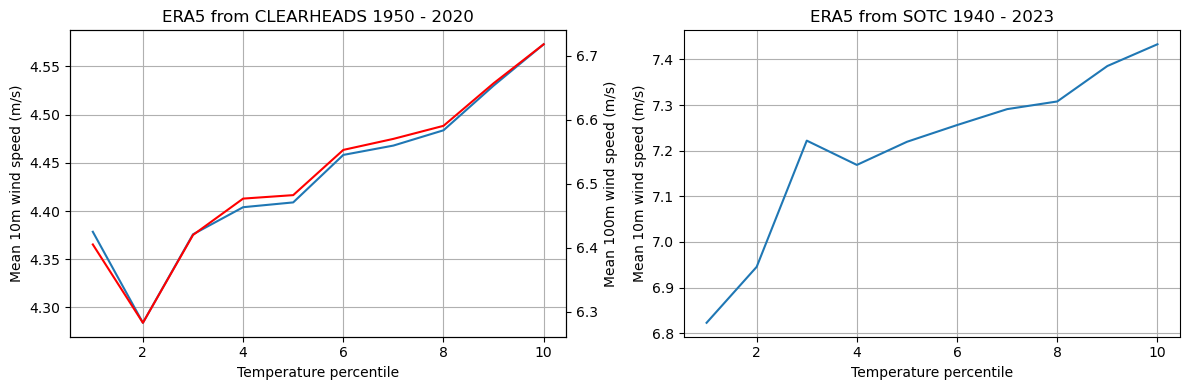

In [14]:
# Set up the plot
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(hannah_ch_djf_perc["percentile"], hannah_ch_djf_perc["mean_10m_wind_speed"])

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(hannah_ch_djf_perc["percentile"], hannah_ch_djf_perc["mean_100m_wind_speed"], color="red")

# Plot the data
axs[1].plot(sotc_djf_perc["percentile"], sotc_djf_perc["mean_10m_wind_speed"])

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 10m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 10m wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 from CLEARHEADS {min_year_ch} - {max_year_ch}")

# Include titles showing the period
axs[1].set_title(f"ERA5 from SOTC {min_year_sotc} - {max_year_sotc}")

# include gridlines
axs[0].grid()
axs[1].grid()

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [15]:
# do the same but subset SOTC to the same period first
sotc_djf_aligned = sotc_djf.loc[hannah_ch_djf.index]

In [16]:
# set up new dataframes
hannah_ch_djf_perc = pd.DataFrame()
sotc_djf_perc = pd.DataFrame()

# Set up the percentiles
percentiles = np.arange(1, 10 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_ch = hannah_ch_djf["t2m_no_detrend"].quantile(percentile / 100)
    tas_percentile_this_sotc = sotc_djf_aligned["UK_temp"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    hannah_ch_djf_this = hannah_ch_djf[hannah_ch_djf["t2m_no_detrend"] < tas_percentile_this_ch]
    sotc_djf_this = sotc_djf_aligned[sotc_djf_aligned["UK_temp"] < tas_percentile_this_sotc]

    # Set up a new dataframe
    hannah_ch_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_ch],
            "n_days": [hannah_ch_djf_this.shape[0]],
            "mean_10m_wind_speed": [hannah_ch_djf_this["10m_wind_speed"].mean()],
            "mean_100m_wind_speed": [hannah_ch_djf_this["100m_wind_speed"].mean()],
        }
    )

    # Set up a new dataframe
    sotc_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_sotc],
            "n_days": [sotc_djf_this.shape[0]],
            "mean_10m_wind_speed": [sotc_djf_this["UK_wind_speed"].mean()],
        }
    )

    # Concat these dataframes
    hannah_ch_djf_perc = pd.concat([hannah_ch_djf_perc, hannah_ch_djf_perc_this])
    sotc_djf_perc = pd.concat([sotc_djf_perc, sotc_djf_perc_this])

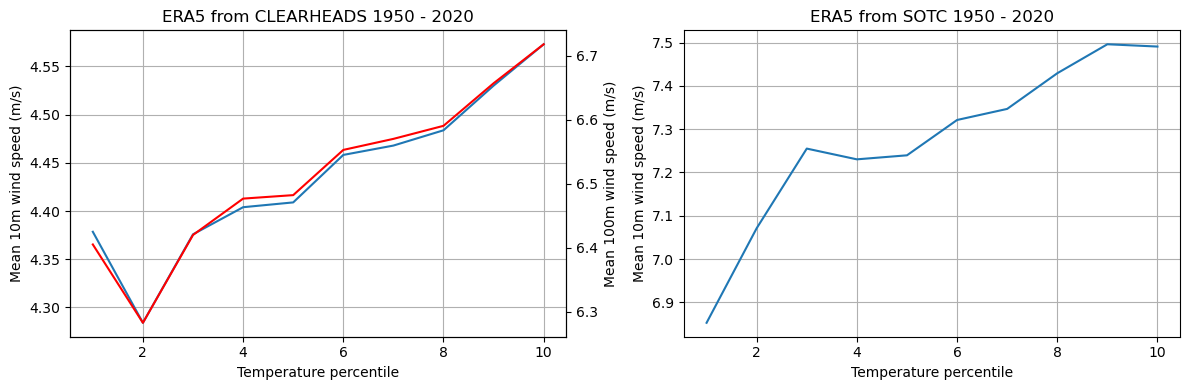

In [17]:
# repeat the plots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(hannah_ch_djf_perc["percentile"], hannah_ch_djf_perc["mean_10m_wind_speed"])

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(hannah_ch_djf_perc["percentile"], hannah_ch_djf_perc["mean_100m_wind_speed"], color="red")

# Plot the data
axs[1].plot(sotc_djf_perc["percentile"], sotc_djf_perc["mean_10m_wind_speed"])

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 10m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 10m wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 from CLEARHEADS {min_year_ch} - {max_year_ch}")

# Include titles showing the period
axs[1].set_title(f"ERA5 from SOTC {min_year_ch} - {max_year_ch}")

# include gridlines
axs[0].grid()

axs[1].grid()

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [18]:
# subset both to the hazel data years
hannah_ch_djf_hazel = hannah_ch_djf[hannah_ch_djf.index.year.isin(hazel_data_years)]
sotc_djf_hazel = sotc_djf_aligned[sotc_djf_aligned.index.year.isin(hazel_data_years)]

# set up new dataframes
hannah_ch_djf_perc = pd.DataFrame()
sotc_djf_perc = pd.DataFrame()

# Set up the percentiles
percentiles = np.arange(1, 10 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_ch = hannah_ch_djf_hazel["t2m_no_detrend"].quantile(percentile / 100)
    tas_percentile_this_sotc = sotc_djf_hazel["UK_temp"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    hannah_ch_djf_this = hannah_ch_djf_hazel[hannah_ch_djf_hazel["t2m_no_detrend"] < tas_percentile_this_ch]
    sotc_djf_this = sotc_djf_hazel[sotc_djf_hazel["UK_temp"] < tas_percentile_this_sotc]

    # Set up a new dataframe
    hannah_ch_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_ch],
            "n_days": [hannah_ch_djf_this.shape[0]],
            "mean_10m_wind_speed": [hannah_ch_djf_this["10m_wind_speed"].mean()],
            "mean_100m_wind_speed": [hannah_ch_djf_this["100m_wind_speed"].mean()],
        }
    )

    # Set up a new dataframe
    sotc_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_sotc],
            "n_days": [sotc_djf_this.shape[0]],
            "mean_10m_wind_speed": [sotc_djf_this["UK_wind_speed"].mean()],
        }
    )

    # Concat these dataframes
    hannah_ch_djf_perc = pd.concat([hannah_ch_djf_perc, hannah_ch_djf_perc_this])
    sotc_djf_perc = pd.concat([sotc_djf_perc, sotc_djf_perc_this])

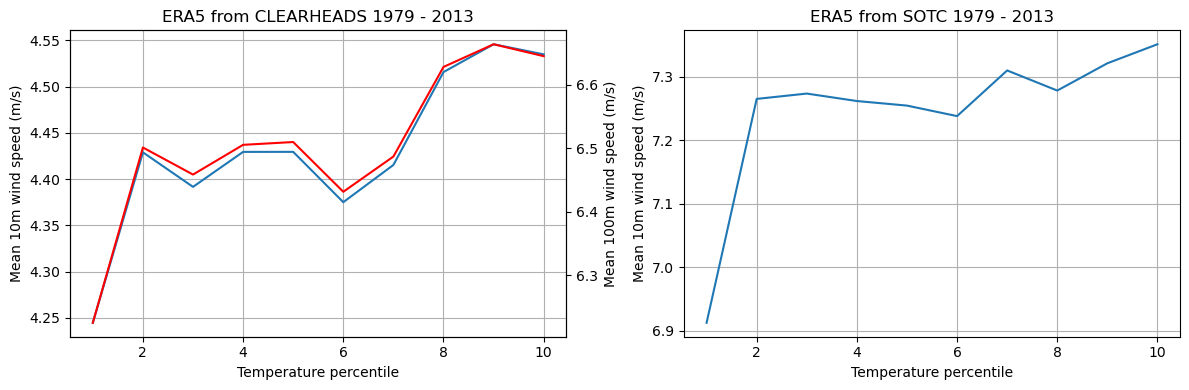

In [19]:
# plot the data
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(hannah_ch_djf_perc["percentile"], hannah_ch_djf_perc["mean_10m_wind_speed"])

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(hannah_ch_djf_perc["percentile"], hannah_ch_djf_perc["mean_100m_wind_speed"], color="red")

# Plot the data
axs[1].plot(sotc_djf_perc["percentile"], sotc_djf_perc["mean_10m_wind_speed"])

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 10m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 10m wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 from CLEARHEADS {hazel_data_years[0]} - {hazel_data_years[-1]}")

# Include titles showing the period
axs[1].set_title(f"ERA5 from SOTC {hazel_data_years[0]} - {hazel_data_years[-1]}")

# include gridlines
axs[0].grid()
axs[1].grid()

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()


In [20]:
# set up the path to the new data
comp_path_1950_2020 = "/home/users/benhutch/unseen_multi_year/dfs/ERA5_UK_wind_components_1950_2020.csv"
comp_path_1940_1949 = "/home/users/benhutch/unseen_multi_year/dfs/ERA5_UK_wind_components_1940_1949.csv"

# import the data
comp_path_1950_2020 = pd.read_csv(comp_path_1950_2020)
comp_path_1940_1949 = pd.read_csv(comp_path_1940_1949)

In [21]:
comp_path_1950_2020.head()

Unnamed: 0  10_metre_U_wind_component  100_metre_U_wind_component  \
0  1950-01-01 00:00:00                   0.386331                    0.935215   
1  1950-01-01 01:00:00                   0.485940                    1.096172   
2  1950-01-01 02:00:00                   0.551973                    1.210463   
3  1950-01-01 03:00:00                   0.732717                    1.552703   
4  1950-01-01 04:00:00                   0.821637                    1.727796   

   2_metre_temperature  100_metre_V_wind_component  10_metre_V_wind_component  \
0           276.895323                    3.575440                   2.078656   
1           277.094161                    3.646120                   2.129140   
2           277.094295                    3.776513                   2.234025   
3           276.945819                    4.024372                   2.399045   
4           277.153835                    4.345119                   2.587758   

   air_pressure_at_mean_sea_level  
0                   102796.528974  
1                   102792.264575  
2                   102863.987450  
3                   102801.402777  
4                   102773.254392

In [22]:
comp_path_1940_1949.head()

Unnamed: 0  100_metre_U_wind_component  \
0  1940-01-01 00:00:00                   -3.010643   
1  1940-01-01 01:00:00                   -3.240462   
2  1940-01-01 02:00:00                   -3.426431   
3  1940-01-01 03:00:00                   -3.563230   
4  1940-01-01 04:00:00                   -3.523177   

   100_metre_V_wind_component  2_metre_temperature  Mean_sea_level_pressure  
0                    2.058466           270.525034            101784.063668  
1                    2.056432           270.605998            101781.536215  
2                    2.117577           270.503522            101829.615537  
3                    2.355417           270.539283            101852.734112  
4                    2.647714           270.627467            101878.532126

In [23]:
# in 1940-1949, rename Mean_sea_level_pressure to air_pressure_at_mean_sea_level
comp_path_1940_1949.rename(columns={"Mean_sea_level_pressure": "air_pressure_at_mean_sea_level"}, inplace=True)

In [24]:
# join the two dataframes, on the Unnamed: 0 column
# where there are values in one dataframe but not the other, fill with NaN
comp_path = pd.concat([comp_path_1940_1949, comp_path_1950_2020], axis=0)

In [25]:
comp_path.tail()

Unnamed: 0  100_metre_U_wind_component  \
622387  2020-12-31 19:00:00                    0.953115   
622388  2020-12-31 20:00:00                    0.875040   
622389  2020-12-31 21:00:00                    0.939768   
622390  2020-12-31 22:00:00                    0.949321   
622391  2020-12-31 23:00:00                    1.178396   

        100_metre_V_wind_component  2_metre_temperature  \
622387                   -5.673930           274.542994   
622388                   -5.697296           274.471601   
622389                   -5.696156           274.353568   
622390                   -5.369600           274.205866   
622391                   -5.506759           274.291179   

        air_pressure_at_mean_sea_level  10_metre_U_wind_component  \
622387                   100903.450419                   0.708579   
622388                   100952.081143                   0.670062   
622389                   101005.618058                   0.706545   
622390                   101054.086288                   0.746968   
622391                   101089.806904                   0.886655   

        10_metre_V_wind_component  
622387                  -3.183507  
622388                  -3.179471  
622389                  -3.154407  
622390                  -2.941405  
622391                  -2.978678

In [26]:
# Make sure that "Unnamed: 0" is a datetime
comp_path["Unnamed: 0"] = pd.to_datetime(comp_path["Unnamed: 0"])

# Set this as the index
comp_path.set_index("Unnamed: 0", inplace=True)

# restrict to months 12, 1, 2
comp_path_djf = comp_path[comp_path.index.month.isin([12, 1, 2])]

# Take daily means
comp_path_djf = comp_path_djf.resample("D").mean()

In [27]:
comp_path_djf.tail()

100_metre_U_wind_component  100_metre_V_wind_component  \
Unnamed: 0                                                           
2020-12-27                    7.269214                    3.802614   
2020-12-28                    0.504144                   -2.430962   
2020-12-29                    2.878448                   -5.731280   
2020-12-30                    4.281745                   -2.514699   
2020-12-31                    2.034569                   -4.903953   

            2_metre_temperature  air_pressure_at_mean_sea_level  \
Unnamed: 0                                                        
2020-12-27           276.728216                    97035.114621   
2020-12-28           274.405865                    97616.179559   
2020-12-29           275.193439                    99243.183322   
2020-12-30           274.126288                   100163.802887   
2020-12-31           274.138022                   100625.613552   

            10_metre_U_wind_component  10_metre_V_wind_component  
Unnamed: 0                                                        
2020-12-27                   4.437414                   2.465486  
2020-12-28                   0.402814                  -1.563478  
2020-12-29                   1.902220                  -3.196857  
2020-12-30                   2.459211                  -1.140012  
2020-12-31                   1.307105                  -2.707067

In [28]:
# quantify the 10m wind speed and 100m wind speed
comp_path_djf["10m_wind_speed"] = np.sqrt(comp_path_djf["10_metre_U_wind_component"] ** 2 + comp_path_djf["10_metre_V_wind_component"] ** 2)
comp_path_djf["100m_wind_speed"] = np.sqrt(comp_path_djf["100_metre_U_wind_component"] ** 2 + comp_path_djf["100_metre_V_wind_component"] ** 2)

In [29]:
hazel_df.head()

date  elec_demand_5yrRmean  elec_demand_5yrRmean_nohols  \
0  1975-01-01                   NaN                          NaN   
1  1975-01-02                   NaN                          NaN   
2  1975-01-03                   NaN                          NaN   
3  1975-01-04                   NaN                          NaN   
4  1975-01-05                   NaN                          NaN   

   gas_demand_5yrRmean  gas_demand_5yrRmean_nohols  gas_demand_raw  
0                  NaN                         NaN             NaN  
1                  NaN                         NaN             NaN  
2                  NaN                         NaN             NaN  
3                  NaN                         NaN             NaN  
4                  NaN                         NaN             NaN

In [30]:
# add the hazel df data to comp_path_djf
# make sure that "date" is a datetime
hazel_df["date"] = pd.to_datetime(hazel_df["date"])

# Set this as the index
hazel_df.set_index("date", inplace=True)

# join the two dataframes
comp_path_djf_ngrid = comp_path_djf.join(hazel_df)

In [31]:
comp_path_djf_ngrid.tail()

100_metre_U_wind_component  100_metre_V_wind_component  \
2020-12-27                    7.269214                    3.802614   
2020-12-28                    0.504144                   -2.430962   
2020-12-29                    2.878448                   -5.731280   
2020-12-30                    4.281745                   -2.514699   
2020-12-31                    2.034569                   -4.903953   

            2_metre_temperature  air_pressure_at_mean_sea_level  \
2020-12-27           276.728216                    97035.114621   
2020-12-28           274.405865                    97616.179559   
2020-12-29           275.193439                    99243.183322   
2020-12-30           274.126288                   100163.802887   
2020-12-31           274.138022                   100625.613552   

            10_metre_U_wind_component  10_metre_V_wind_component  \
2020-12-27                   4.437414                   2.465486   
2020-12-28                   0.402814                  -1.563478   
2020-12-29                   1.902220                  -3.196857   
2020-12-30                   2.459211                  -1.140012   
2020-12-31                   1.307105                  -2.707067   

            10m_wind_speed  100m_wind_speed  elec_demand_5yrRmean  \
2020-12-27        5.076344         8.203739                   NaN   
2020-12-28        1.614535         2.482688                   NaN   
2020-12-29        3.719992         6.413504                   NaN   
2020-12-30        2.710599         4.965587                   NaN   
2020-12-31        3.006117         5.309259                   NaN   

            elec_demand_5yrRmean_nohols  gas_demand_5yrRmean  \
2020-12-27                          NaN                  NaN   
2020-12-28                          NaN                  NaN   
2020-12-29                          NaN                  NaN   
2020-12-30                          NaN                  NaN   
2020-12-31                          NaN                  NaN   

            gas_demand_5yrRmean_nohols  gas_demand_raw  
2020-12-27                         NaN             NaN  
2020-12-28                         NaN             NaN  
2020-12-29                         NaN             NaN  
2020-12-30                         NaN             NaN  
2020-12-31                         NaN             NaN

In [32]:
comp_path_djf_ngrid.columns

Index(['100_metre_U_wind_component', '100_metre_V_wind_component',
       '2_metre_temperature', 'air_pressure_at_mean_sea_level',
       '10_metre_U_wind_component', '10_metre_V_wind_component',
       '10m_wind_speed', '100m_wind_speed', 'elec_demand_5yrRmean',
       'elec_demand_5yrRmean_nohols', 'gas_demand_5yrRmean',
       'gas_demand_5yrRmean_nohols', 'gas_demand_raw'],
      dtype='object')

In [33]:
# find the first non-nan date for the elec_demand_5yrRmean column
first_non_nan = comp_path_djf_ngrid["elec_demand_5yrRmean"].first_valid_index()
last_non_nan = comp_path_djf_ngrid["elec_demand_5yrRmean"].last_valid_index()

# subset the dataframe to this period
comp_path_djf_ngrid_subset = comp_path_djf_ngrid.loc[first_non_nan:last_non_nan]

In [34]:
# subset comp_path_djf_ngrid to the years 1979-2013
comp_path_djf_ngrid_valid_years = comp_path_djf_ngrid[comp_path_djf_ngrid.index.year.isin(hazel_data_years)]

In [35]:
comp_path_djf_ngrid_valid_years.tail()

100_metre_U_wind_component  100_metre_V_wind_component  \
2013-12-27                    7.296314                   10.840747   
2013-12-28                    8.302495                    2.700495   
2013-12-29                    4.847303                    4.631911   
2013-12-30                    4.520476                    7.276878   
2013-12-31                   -0.176666                    9.611028   

            2_metre_temperature  air_pressure_at_mean_sea_level  \
2013-12-27           280.011558                    97139.206367   
2013-12-28           277.793740                    99007.102031   
2013-12-29           277.484037                   100807.495348   
2013-12-30           280.036650                   100123.557621   
2013-12-31           279.099330                    99668.145803   

            10_metre_U_wind_component  10_metre_V_wind_component  \
2013-12-27                   4.457854                   7.081126   
2013-12-28                   4.975838                   1.892375   
2013-12-29                   2.546244                   3.021480   
2013-12-30                   2.519360                   4.674678   
2013-12-31                  -0.456119                   5.868649   

            10m_wind_speed  100m_wind_speed  elec_demand_5yrRmean  \
2013-12-27        8.367485        13.067440                   NaN   
2013-12-28        5.323537         8.730642                   NaN   
2013-12-29        3.951291         6.704547                   NaN   
2013-12-30        5.310347         8.566660                   NaN   
2013-12-31        5.886348         9.612651                   NaN   

            elec_demand_5yrRmean_nohols  gas_demand_5yrRmean  \
2013-12-27                          NaN                  NaN   
2013-12-28                          NaN                  NaN   
2013-12-29                          NaN                  NaN   
2013-12-30                          NaN                  NaN   
2013-12-31                          NaN                  NaN   

            gas_demand_5yrRmean_nohols  gas_demand_raw  
2013-12-27                         NaN             NaN  
2013-12-28                         NaN             NaN  
2013-12-29                         NaN             NaN  
2013-12-30                         NaN             NaN  
2013-12-31                         NaN             NaN

In [36]:
# subset the compo_path_djf_ngrid_valid_years to months 12, 1, 2
comp_path_djf_ngrid_valid_years_djf = comp_path_djf_ngrid_valid_years[comp_path_djf_ngrid_valid_years.index.month.isin([12, 1, 2])]

In [37]:
# assert that elec_demand_5yrRmean is not NaN
# find the dates where this is NaN
nan_dates = comp_path_djf_ngrid_valid_years_djf[comp_path_djf_ngrid_valid_years_djf["elec_demand_5yrRmean"].isnull()].index

# print these dates
print(nan_dates)

# drop these dates
comp_path_djf_ngrid_valid_years_djf = comp_path_djf_ngrid_valid_years_djf.drop(nan_dates)

DatetimeIndex(['2013-12-01', '2013-12-02', '2013-12-03', '2013-12-04',
               '2013-12-05', '2013-12-06', '2013-12-07', '2013-12-08',
               '2013-12-09', '2013-12-10', '2013-12-11', '2013-12-12',
               '2013-12-13', '2013-12-14', '2013-12-15', '2013-12-16',
               '2013-12-17', '2013-12-18', '2013-12-19', '2013-12-20',
               '2013-12-21', '2013-12-22', '2013-12-23', '2013-12-24',
               '2013-12-25', '2013-12-26', '2013-12-27', '2013-12-28',
               '2013-12-29', '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', freq=None)


In [38]:
# assrert that none of elec_demand_5yrRmean is NaN
assert comp_path_djf_ngrid_valid_years_djf["elec_demand_5yrRmean"].isnull().sum() == 0

In [39]:
comp_path_djf_ngrid_valid_years_djf.head()

100_metre_U_wind_component  100_metre_V_wind_component  \
1979-01-01                    3.772717                   -2.551310   
1979-01-02                    5.549878                   -0.456022   
1979-01-03                   -0.547130                    6.587506   
1979-01-04                   -5.559512                    0.106724   
1979-01-05                   -1.602515                    1.299845   

            2_metre_temperature  air_pressure_at_mean_sea_level  \
1979-01-01           268.185221                   101959.300223   
1979-01-02           271.649990                   102349.166068   
1979-01-03           272.034151                   101535.002660   
1979-01-04           271.899579                   101171.362286   
1979-01-05           270.158258                   102288.908632   

            10_metre_U_wind_component  10_metre_V_wind_component  \
1979-01-01                   2.204444                  -1.249939   
1979-01-02                   3.086944                   0.035289   
1979-01-03                  -0.754660                   3.769186   
1979-01-04                  -3.394359                  -0.284860   
1979-01-05                  -1.074426                   0.639066   

            10m_wind_speed  100m_wind_speed  elec_demand_5yrRmean  \
1979-01-01        2.534151         4.554401           1100.321464   
1979-01-02        3.087145         5.568581           1104.415357   
1979-01-03        3.843992         6.610188           1108.505055   
1979-01-04        3.406291         5.560536           1112.590542   
1979-01-05        1.250118         2.063408           1116.671815   

            elec_demand_5yrRmean_nohols  gas_demand_5yrRmean  \
1979-01-01                          NaN                  NaN   
1979-01-02                          NaN                  NaN   
1979-01-03                          NaN                  NaN   
1979-01-04                          NaN                  NaN   
1979-01-05                  1116.671815                  NaN   

            gas_demand_5yrRmean_nohols  gas_demand_raw  
1979-01-01                         NaN             NaN  
1979-01-02                         NaN             NaN  
1979-01-03                         NaN             NaN  
1979-01-04                         NaN             NaN  
1979-01-05                         NaN             NaN

In [40]:
comp_path_djf_ngrid_valid_years_djf.tail()

100_metre_U_wind_component  100_metre_V_wind_component  \
2013-02-24                   -2.202752                   -4.574842   
2013-02-25                   -2.530495                   -4.275996   
2013-02-26                   -3.934151                   -1.945699   
2013-02-27                   -1.379497                   -2.212351   
2013-02-28                   -1.511843                   -4.215058   

            2_metre_temperature  air_pressure_at_mean_sea_level  \
2013-02-24           274.290850                   102838.661851   
2013-02-25           275.473864                   103206.273334   
2013-02-26           275.943090                   103572.313792   
2013-02-27           275.773869                   103658.667234   
2013-02-28           276.963282                   103282.534647   

            10_metre_U_wind_component  10_metre_V_wind_component  \
2013-02-24                  -1.164825                  -2.867094   
2013-02-25                  -1.428440                  -2.703240   
2013-02-26                  -2.485652                  -1.382813   
2013-02-27                  -0.807243                  -1.463380   
2013-02-28                  -0.713970                  -2.550698   

            10m_wind_speed  100m_wind_speed  elec_demand_5yrRmean  \
2013-02-24        3.094680         5.077529            992.340437   
2013-02-25        3.057442         4.968656            990.056876   
2013-02-26        2.844405         4.388996            999.269196   
2013-02-27        1.671264         2.607203            980.477019   
2013-02-28        2.648738         4.477988            966.679972   

            elec_demand_5yrRmean_nohols  gas_demand_5yrRmean  \
2013-02-24                          NaN                  NaN   
2013-02-25                   990.056876                  NaN   
2013-02-26                   999.269196                  NaN   
2013-02-27                   980.477019                  NaN   
2013-02-28                   966.679972                  NaN   

            gas_demand_5yrRmean_nohols  gas_demand_raw  
2013-02-24                         NaN             NaN  
2013-02-25                         NaN             NaN  
2013-02-26                         NaN             NaN  
2013-02-27                         NaN             NaN  
2013-02-28                         NaN             NaN

In [41]:
# set up the path to the data
nao_path = "/home/users/benhutch/unseen_multi_year/dfs/nao_delta_p_indices_1975_2015.csv"

# import the data
nao = pd.read_csv(nao_path)

In [42]:
# print nao_head
nao.tail()

time  nao_index  delta_p_index
14970  2015-12-27  11.442500     -11.613047
14971  2015-12-28  39.965938     -10.455547
14972  2015-12-29  37.012031     -14.001797
14973  2015-12-30  22.472266     -22.014922
14974  2015-12-31  44.907031     -24.288828

In [43]:
# set time as a datetime
nao["time"] = pd.to_datetime(nao["time"])

# set time as the index
nao.set_index("time", inplace=True)

In [44]:
# subset nao to djf
nao_djf = nao[nao.index.month.isin([12, 1, 2])]

In [45]:
# join the dataframe
comp_path_djf_ngrid_valid_years_djf_nao = comp_path_djf_ngrid_valid_years_djf.join(nao_djf)

In [46]:
comp_path_djf_ngrid_valid_years_djf_nao.head()

100_metre_U_wind_component  100_metre_V_wind_component  \
1979-01-01                    3.772717                   -2.551310   
1979-01-02                    5.549878                   -0.456022   
1979-01-03                   -0.547130                    6.587506   
1979-01-04                   -5.559512                    0.106724   
1979-01-05                   -1.602515                    1.299845   

            2_metre_temperature  air_pressure_at_mean_sea_level  \
1979-01-01           268.185221                   101959.300223   
1979-01-02           271.649990                   102349.166068   
1979-01-03           272.034151                   101535.002660   
1979-01-04           271.899579                   101171.362286   
1979-01-05           270.158258                   102288.908632   

            10_metre_U_wind_component  10_metre_V_wind_component  \
1979-01-01                   2.204444                  -1.249939   
1979-01-02                   3.086944                   0.035289   
1979-01-03                  -0.754660                   3.769186   
1979-01-04                  -3.394359                  -0.284860   
1979-01-05                  -1.074426                   0.639066   

            10m_wind_speed  100m_wind_speed  elec_demand_5yrRmean  \
1979-01-01        2.534151         4.554401           1100.321464   
1979-01-02        3.087145         5.568581           1104.415357   
1979-01-03        3.843992         6.610188           1108.505055   
1979-01-04        3.406291         5.560536           1112.590542   
1979-01-05        1.250118         2.063408           1116.671815   

            elec_demand_5yrRmean_nohols  gas_demand_5yrRmean  \
1979-01-01                          NaN                  NaN   
1979-01-02                          NaN                  NaN   
1979-01-03                          NaN                  NaN   
1979-01-04                          NaN                  NaN   
1979-01-05                  1116.671815                  NaN   

            gas_demand_5yrRmean_nohols  gas_demand_raw  nao_index  \
1979-01-01                         NaN             NaN   6.061641   
1979-01-02                         NaN             NaN  -2.826953   
1979-01-03                         NaN             NaN   1.476484   
1979-01-04                         NaN             NaN   2.875781   
1979-01-05                         NaN             NaN  37.253203   

            delta_p_index  
1979-01-01       2.984688  
1979-01-02      -3.031016  
1979-01-03      -1.329375  
1979-01-04       6.661875  
1979-01-05      -9.272813

In [47]:
# load in the south of engalnd temperature data
se_temp_path = "/home/users/benhutch/unseen_multi_year/dfs/t2m_south_england_ERA5_1950_2020_lat1-505_lat2-540_lon1--3_lon2-1.csv"

# import the data
se_temp = pd.read_csv(se_temp_path)

In [48]:
# make sure that time is a datetime
se_temp["time"] = pd.to_datetime(se_temp["time"])

# set time as the index
se_temp.set_index("time", inplace=True)

In [49]:
# join the dataframe
comp_path_djf_ngrid_valid_years_djf_nao_se = comp_path_djf_ngrid_valid_years_djf_nao.join(se_temp)

In [50]:
# load in the additional data
london_temp_path = "/home/users/benhutch/unseen_multi_year/dfs/t2m_south_england_ERA5_1950_2020_south_east_england_box.csv"

# import the data
london_temp = pd.read_csv(london_temp_path)

# rename the 't2m_south_england' to 't2m_london'
london_temp.rename(columns={"t2m_south_england": "t2m_london"}, inplace=True)

# make sure that time is a datetime
london_temp["time"] = pd.to_datetime(london_temp["time"])

# set time as the index
london_temp.set_index("time", inplace=True)

In [51]:
london_temp.head()

t2m_london
time                  
1950-01-01   274.65247
1950-01-02   280.52484
1950-01-03   282.85544
1950-01-04   281.72015
1950-01-05   280.95413

In [52]:
# join the dataframe
comp_path_djf_ngrid_valid_years_djf_nao_se_london = comp_path_djf_ngrid_valid_years_djf_nao_se.join(london_temp)

In [74]:
# import the london box data
london_box_path = "/home/users/benhutch/unseen_multi_year/dfs/ERA5_UK_wind_components_1940_2020_london_box.csv"

# import the data
london_box = pd.read_csv(london_box_path)

In [76]:
# Rename Unnamed: 0 to time
london_box.rename(columns={"Unnamed: 0": "time"}, inplace=True)

# make sure that time is a datetime
london_box["time"] = pd.to_datetime(london_box["time"])

# set time as the index
london_box.set_index("time", inplace=True)

# take daily averages
london_box = london_box.resample("D").mean()

In [78]:
london_box.tail()

100_metre_U_wind_component_london  \
time                                            
2020-12-27                           8.487828   
2020-12-28                           0.779015   
2020-12-29                           3.929064   
2020-12-30                           4.943708   
2020-12-31                           2.691110   

            100_metre_V_wind_component_london  2_metre_temperature_london  \
time                                                                        
2020-12-27                           6.524727                  278.654235   
2020-12-28                          -0.465314                  274.708763   
2020-12-29                          -3.176572                  275.256535   
2020-12-30                          -2.097266                  274.747803   
2020-12-31                          -3.982362                  272.696118   

            Mean_sea_level_pressure_london  10_metre_V_wind_component_london  \
time                                                                           
2020-12-27                             NaN                          4.154099   
2020-12-28                             NaN                         -0.470102   
2020-12-29                             NaN                         -1.580889   
2020-12-30                             NaN                         -0.823281   
2020-12-31                             NaN                         -1.932720   

            10_metre_U_wind_component_london  \
time                                           
2020-12-27                          4.987752   
2020-12-28                          0.302060   
2020-12-29                          2.473487   
2020-12-30                          2.843537   
2020-12-31                          1.660303   

            air_pressure_at_mean_sea_level_london  
time                                               
2020-12-27                           97708.938605  
2020-12-28                           97457.851226  
2020-12-29                           98972.346460  
2020-12-30                          100202.147236  
2020-12-31                          100522.983302

In [80]:
comp_path_djf_ngrid_valid_years_djf_nao_se_london.tail()

100_metre_U_wind_component  100_metre_V_wind_component  \
2013-02-24                   -2.202752                   -4.574842   
2013-02-25                   -2.530495                   -4.275996   
2013-02-26                   -3.934151                   -1.945699   
2013-02-27                   -1.379497                   -2.212351   
2013-02-28                   -1.511843                   -4.215058   

            2_metre_temperature  air_pressure_at_mean_sea_level  \
2013-02-24           274.290850                   102838.661851   
2013-02-25           275.473864                   103206.273334   
2013-02-26           275.943090                   103572.313792   
2013-02-27           275.773869                   103658.667234   
2013-02-28           276.963282                   103282.534647   

            10_metre_U_wind_component  10_metre_V_wind_component  \
2013-02-24                  -1.164825                  -2.867094   
2013-02-25                  -1.428440                  -2.703240   
2013-02-26                  -2.485652                  -1.382813   
2013-02-27                  -0.807243                  -1.463380   
2013-02-28                  -0.713970                  -2.550698   

            10m_wind_speed  100m_wind_speed  elec_demand_5yrRmean  \
2013-02-24        3.094680         5.077529            992.340437   
2013-02-25        3.057442         4.968656            990.056876   
2013-02-26        2.844405         4.388996            999.269196   
2013-02-27        1.671264         2.607203            980.477019   
2013-02-28        2.648738         4.477988            966.679972   

            elec_demand_5yrRmean_nohols  gas_demand_5yrRmean  \
2013-02-24                          NaN                  NaN   
2013-02-25                   990.056876                  NaN   
2013-02-26                   999.269196                  NaN   
2013-02-27                   980.477019                  NaN   
2013-02-28                   966.679972                  NaN   

            gas_demand_5yrRmean_nohols  gas_demand_raw  nao_index  \
2013-02-24                         NaN             NaN   6.000625   
2013-02-25                         NaN             NaN   7.214141   
2013-02-26                         NaN             NaN   9.882734   
2013-02-27                         NaN             NaN   8.497422   
2013-02-28                         NaN             NaN -17.439609   

            delta_p_index  t2m_south_england  t2m_london  
2013-02-24       5.406484          274.28530   274.03513  
2013-02-25       0.467422          276.02344   275.84190  
2013-02-26      -2.171016          276.61533   276.53360  
2013-02-27      -4.749844          276.20465   276.06216  
2013-02-28      -1.190703          276.52548   276.66592

In [81]:
# join the dataframe
comp_path_djf_ngrid_valid_years_djf_nao_se_london_box = comp_path_djf_ngrid_valid_years_djf_nao_se_london.join(london_box)

In [82]:
comp_path_djf_ngrid_valid_years_djf_nao_se_london_box.columns

Index(['100_metre_U_wind_component', '100_metre_V_wind_component',
       '2_metre_temperature', 'air_pressure_at_mean_sea_level',
       '10_metre_U_wind_component', '10_metre_V_wind_component',
       '10m_wind_speed', '100m_wind_speed', 'elec_demand_5yrRmean',
       'elec_demand_5yrRmean_nohols', 'gas_demand_5yrRmean',
       'gas_demand_5yrRmean_nohols', 'gas_demand_raw', 'nao_index',
       'delta_p_index', 't2m_south_england', 't2m_london',
       '100_metre_U_wind_component_london',
       '100_metre_V_wind_component_london', '2_metre_temperature_london',
       'Mean_sea_level_pressure_london', '10_metre_V_wind_component_london',
       '10_metre_U_wind_component_london',
       'air_pressure_at_mean_sea_level_london'],
      dtype='object')

In [83]:
# print the unique months in the index of comp_path_djf_ngrid_valid_years_djf_nao_se_london_box
print(comp_path_djf_ngrid_valid_years_djf_nao_se_london_box.index.month.unique())

Index([1, 2, 12], dtype='int32')


In [54]:
# join the south of england temperature data
comp_path_djf_south_england = comp_path_djf.join(se_temp)

# join the london temperature data
comp_path_djf_south_england_london = comp_path_djf_south_england.join(london_temp)

In [67]:
comp_path_djf_south_england_london.columns

Index(['100_metre_U_wind_component', '100_metre_V_wind_component',
       '2_metre_temperature', 'air_pressure_at_mean_sea_level',
       '10_metre_U_wind_component', '10_metre_V_wind_component',
       '10m_wind_speed', '100m_wind_speed', 't2m_south_england', 't2m_london'],
      dtype='object')

In [56]:
# limit oto 1950-2020
comp_path_djf_south_england_london = comp_path_djf_south_england_london.loc["1950":"2020"]

In [57]:
# limit to months 12, 1, 2
comp_path_djf_south_england_london = comp_path_djf_south_england_london[comp_path_djf_south_england_london.index.month.isin([12, 1, 2])]

In [58]:
# set up the new dataframes
comp_path_djf_south_england_perc_full_5 = pd.DataFrame()
comp_path_djf_south_england_perc_full_5_se = pd.DataFrame()
comp_path_djf_south_england_perc_full_5_london = pd.DataFrame()

# Set up the min and max year
min_year_se = comp_path_djf_south_england_london.index.year.min()
max_year_se = comp_path_djf_south_england_london.index.year.max()

# Set up the percentiles
percentiles = np.arange(1, 100, 1)
percentiles_5 = np.arange(0, 95 + 1, 1)

# loop over the percentiles
for perc_this in percentiles_5:
    # Find the lower and upper bound
    lower_bound = perc_this / 100
    upper_bound = (perc_this + 5) / 100

    # Find the percentile for south england
    tas_lower_bound_5 = comp_path_djf_south_england_london["2_metre_temperature"].quantile(lower_bound)
    tas_upper_bound_5 = comp_path_djf_south_england_london["2_metre_temperature"].quantile(upper_bound)

    # do the same for the south of england t2m
    tas_lower_bound_5_se = comp_path_djf_south_england_london["t2m_south_england"].quantile(lower_bound)
    tas_upper_bound_5_se = comp_path_djf_south_england_london["t2m_south_england"].quantile(upper_bound)

    # do the same but for london
    tas_lower_bound_5_london = comp_path_djf_south_england_london["t2m_london"].quantile(lower_bound)
    tas_upper_bound_5_london = comp_path_djf_south_england_london["t2m_london"].quantile(upper_bound)

    # subset the dataframe to where temperature is below this threshold
    comp_path_djf_south_england_this = comp_path_djf_south_england_london[
        (comp_path_djf_south_england_london["2_metre_temperature"] >= tas_lower_bound_5)
        & (comp_path_djf_south_england_london["2_metre_temperature"] < tas_upper_bound_5)
    ]

    # subset the dataframe to where temperature is below this threshold
    comp_path_djf_south_england_this_se = comp_path_djf_south_england_london[
        (comp_path_djf_south_england_london["t2m_south_england"] >= tas_lower_bound_5_se)
        & (comp_path_djf_south_england_london["t2m_south_england"] < tas_upper_bound_5_se)
    ]

    # subset the dataframe to where temperature is below this threshold
    comp_path_djf_south_england_this_london = comp_path_djf_south_england_london[
        (comp_path_djf_south_england_london["t2m_london"] >= tas_lower_bound_5_london)
        & (comp_path_djf_south_england_london["t2m_london"] < tas_upper_bound_5_london)
    ]

    # extract the valid dates
    valid_dates_t2m = comp_path_djf_south_england_this.dropna(subset=["2_metre_temperature"]).index
    valid_dates_t2m_se = comp_path_djf_south_england_this_se.dropna(subset=["t2m_south_england"]).index
    valid_dates_t2m_london = comp_path_djf_south_england_this_london.dropna(subset=["t2m_london"]).index

    # Make sure these are lists of strs in the yyyy-mm-dd format
    valid_dates_t2m = [str(date_this.date()) for date_this in valid_dates_t2m]
    valid_dates_t2m_se = [str(date_this.date()) for date_this in valid_dates_t2m_se]
    valid_dates_t2m_london = [str(date_this.date()) for date_this in valid_dates_t2m_london]

    # Set up a new dataframe for temperature
    comp_path_djf_south_england_perc_this_t2m = pd.DataFrame(
        {
            "percentile": [perc_this],
            "lower_bound": [tas_lower_bound_5],
            "upper_bound": [tas_upper_bound_5],
            "n_days_t2m": [comp_path_djf_south_england_this.shape[0]],
            "valid_dates_t2m": [valid_dates_t2m],
            "mean_10m_U": [comp_path_djf_south_england_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_path_djf_south_england_this["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_path_djf_south_england_this["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_path_djf_south_england_this["100_metre_U_wind_component"].mean()],
            "mean_100m_V": [comp_path_djf_south_england_this["100_metre_V_wind_component"].mean()],
            "mean_100m_wind_speed": [comp_path_djf_south_england_this["100m_wind_speed"].mean()],
            "mean_psl": [comp_path_djf_south_england_this["air_pressure_at_mean_sea_level"].mean()],
        }
    )

    # Set up a new dataframe for temperature se
    comp_path_djf_south_england_perc_this_t2m_se = pd.DataFrame(
        {
            "percentile": [perc_this],
            "lower_bound": [tas_lower_bound_5_se],
            "upper_bound": [tas_upper_bound_5_se],
            "n_days_t2m_se": [comp_path_djf_south_england_this_se.shape[0]],
            "valid_dates_t2m_se": [valid_dates_t2m_se],
            "mean_10m_U": [comp_path_djf_south_england_this_se["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_path_djf_south_england_this_se["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_path_djf_south_england_this_se["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_path_djf_south_england_this_se["100_metre_U_wind_component"].mean()],
            "mean_100m_V": [comp_path_djf_south_england_this_se["100_metre_V_wind_component"].mean()],
            "mean_100m_wind_speed": [comp_path_djf_south_england_this_se["100m_wind_speed"].mean()],
            "mean_psl": [comp_path_djf_south_england_this_se["air_pressure_at_mean_sea_level"].mean()],
        }
    )

    # Set up a new dataframe for temperature london
    comp_path_djf_south_england_perc_this_t2m_london = pd.DataFrame(
        {
            "percentile": [perc_this],
            "lower_bound": [tas_lower_bound_5_london],
            "upper_bound": [tas_upper_bound_5_london],
            "n_days_t2m_london": [comp_path_djf_south_england_this_london.shape[0]],
            "valid_dates_t2m_london": [valid_dates_t2m_london],
            "mean_10m_U": [comp_path_djf_south_england_this_london["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_path_djf_south_england_this_london["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_path_djf_south_england_this_london["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_path_djf_south_england_this_london["100_metre_U_wind_component"].mean()],
            "mean_100m_V": [comp_path_djf_south_england_this_london["100_metre_V_wind_component"].mean()],
            "mean_100m_wind_speed": [comp_path_djf_south_england_this_london["100m_wind_speed"].mean()],
            "mean_psl": [comp_path_djf_south_england_this_london["air_pressure_at_mean_sea_level"].mean()],
        }
    )

    # Concat these dataframes
    comp_path_djf_south_england_perc_full_5 = pd.concat([comp_path_djf_south_england_perc_full_5, comp_path_djf_south_england_perc_this_t2m])
    comp_path_djf_south_england_perc_full_5_se = pd.concat([comp_path_djf_south_england_perc_full_5_se, comp_path_djf_south_england_perc_this_t2m_se])
    comp_path_djf_south_england_perc_full_5_london = pd.concat([comp_path_djf_south_england_perc_full_5_london, comp_path_djf_south_england_perc_this_t2m_london])

Text(0.5, 1.0, 'DJF Temp/demand percentiles 1950 - 2020')

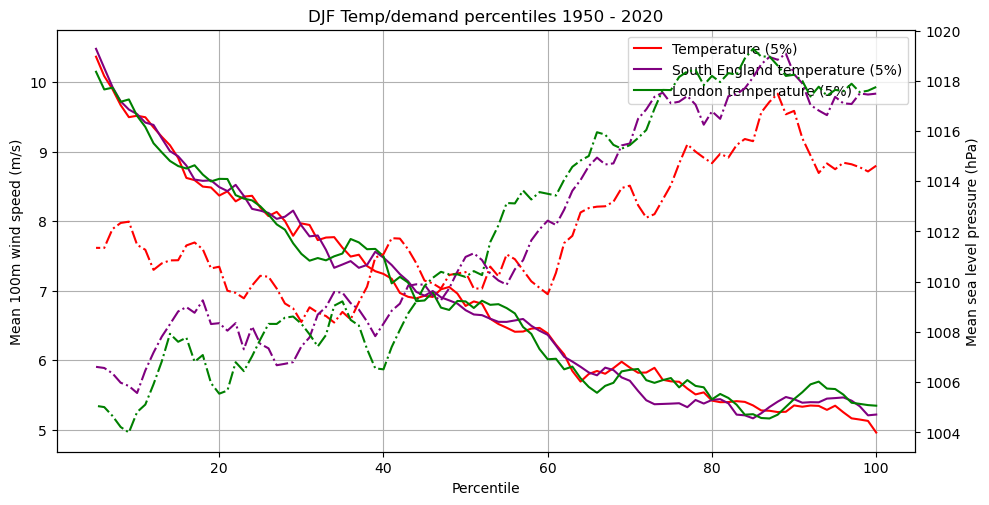

In [66]:
# do the same in a single plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

# Plot the data
# ax.plot(100 - comp_djf_perc_temp_full["percentile"], comp_djf_perc_temp_full["mean_100m_wind_speed"], label="Temperature (1%)", color="red", linestyle="--", alpha=0.5)

# Plot the data
# ax.plot(comp_djf_perc_elec_full["percentile"], comp_djf_perc_elec_full["mean_100m_wind_speed"], label="Electricity demand (1%)", color="k", linestyle="--", alpha=0.5)

# plot the 5% data as solid lines
# Plot the data
ax.plot(100 - comp_path_djf_south_england_perc_full_5["percentile"], comp_path_djf_south_england_perc_full_5["mean_100m_wind_speed"], color="red", label="Temperature (5%)")

# same for the south of england temperature 
# in purple
ax.plot(100 - comp_path_djf_south_england_perc_full_5_se["percentile"], comp_path_djf_south_england_perc_full_5_se["mean_100m_wind_speed"], color="purple", label="South England temperature (5%)")

# same for the london temperature
# in green
ax.plot(100 - comp_path_djf_south_england_perc_full_5_london["percentile"], comp_path_djf_south_england_perc_full_5_london["mean_100m_wind_speed"], color="green", label="London temperature (5%)")

# # Plot the data
# ax.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_wind_speed"], color="k", label="Electricity demand (5%)")

# # plot the southe of england temperature df
# ax.plot(100 - comp_djf_perc_temp_se_full_5["percentile"], comp_djf_perc_temp_se_full_5["mean_100m_wind_speed"], color="purple", label="South England temperature (5%)")

# plot the data
# ax.plot(100 - comp_djf_perc_temp_full["percentile"], comp_djf_perc_temp_full["mean_100m_wind_speed"], color="red", label="Temperature (1%)", linestyle="--")

# duplicate the y axis
ax2 = ax.twinx()

# plot the u component of wind in blue
# Plot the data
ax2.plot(100 - comp_path_djf_south_england_perc_full_5["percentile"], comp_path_djf_south_england_perc_full_5["mean_psl"] / 100, color="red", label="Temperature (5%)", linestyle="-.")

# plot the U component of the wind in purple
ax2.plot(100 - comp_path_djf_south_england_perc_full_5_se["percentile"], comp_path_djf_south_england_perc_full_5_se["mean_psl"] / 100, color="purple", label="South England temperature (5%)", linestyle="-.")

# plot the U component of the wind in green
ax2.plot(100 - comp_path_djf_south_england_perc_full_5_london["percentile"], comp_path_djf_south_england_perc_full_5_london["mean_psl"] / 100, color="green", label="London temperature (5%)", linestyle="-.")

# # Plot the data
# ax2.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_U"], color="k", label="Electricity demand (5%)", linestyle="-.")

# # plot the south of england temperature df
# ax2.plot(100 - comp_djf_perc_temp_se_full_5["percentile"], comp_djf_perc_temp_se_full_5["mean_100m_U"], color="purple", label="South England temperature (5%)", linestyle="-.")

# set the ylabel
ax2.set_ylabel("Mean sea level pressure (hPa)")

# # include a dotdahed grey line for 0 on the second y-axis
# ax2.axhline(0, color="grey", linestyle=":")

# # plot the rolling average
# # Plot the data
# ax.plot(100 - comp_djf_perc_temp_full_rolling["percentile_rolling"], comp_djf_perc_temp_full_rolling["mean_100m_wind_speed_rolling"], color="red", label="Temperature (5%)", linestyle="--")

# # Plot the data
# ax.plot(comp_djf_perc_elec_full_rolling["percentile_rolling"], comp_djf_perc_elec_full_rolling["mean_100m_wind_speed_rolling"], color="k", label="Electricity demand (5%)", linestyle="--")

# Set the labels
ax.set_xlabel("Percentile")

# Set the labels
ax.set_ylabel("Mean 100m wind speed (m/s)")

# include gridlines
ax.grid()

# include a legend
ax.legend()

# set a tight layout
plt.tight_layout()

# include titles
ax.set_title(f"DJF Temp/demand percentiles {min_year_se} - {max_year_se}")

In [85]:
# set up new dataframes
comp_djf_perc_temp_full = pd.DataFrame()
comp_djf_perc_temp_se_full = pd.DataFrame()
comp_djf_perc_elec_full = pd.DataFrame()
comp_djf_perc_temp_full_5 = pd.DataFrame()
comp_djf_perc_temp_se_full_5 = pd.DataFrame()
comp_djf_perc_temp_london_full_5 = pd.DataFrame()
comp_djf_perc_elec_full_5 = pd.DataFrame()

# set up the min and max year
min_year_comp = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box.index.year.min()
max_year_comp = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box.index.year.max()

# Set up the percentiles
percentiles = np.arange(1, 100, 1)
percentiles_5 = np.arange(0, 95 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the lower and upper bounds for this percentile
    lower_bound = percentile / 100
    upper_bound = (percentile + 1) / 100

    # # print the lower and upper bounds
    # print(lower_bound, upper_bound)

    # Find the percentile thresholds for temperature and electric demand
    tas_lower_bound = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["2_metre_temperature"].quantile(lower_bound)
    tas_upper_bound = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["2_metre_temperature"].quantile(upper_bound)
    tas_se_lower_bound = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["t2m_south_england"].quantile(lower_bound)
    tas_se_upper_bound = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["t2m_south_england"].quantile(upper_bound)
    elec_demand_lower_bound = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["elec_demand_5yrRmean"].quantile(lower_bound)
    elec_demand_upper_bound = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["elec_demand_5yrRmean"].quantile(upper_bound)

    # Subset the df to where temperature is within this bin
    comp_djf_this_temp = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box[
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["2_metre_temperature"] >= tas_lower_bound) &
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["2_metre_temperature"] < tas_upper_bound)
    ]

    # Subset the df to where south england temperature is within this bin
    comp_djf_this_temp_se = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box[
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["t2m_south_england"] >= tas_se_lower_bound) &
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["t2m_south_england"] < tas_se_upper_bound)
    ]

    # Subset the df to where electric demand is within this bin
    comp_djf_this_elec = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box[
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["elec_demand_5yrRmean"] >= elec_demand_lower_bound) &
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["elec_demand_5yrRmean"] < elec_demand_upper_bound)
    ]

    # Set up a new dataframe for temperature
    comp_djf_perc_temp = pd.DataFrame(
        {
            "percentile": [100 * ((lower_bound + upper_bound) / 2)],
            "threshold": [tas_lower_bound],
            "n_days": [comp_djf_this_temp.shape[0]],
            "mean_10m_U": [comp_djf_this_temp["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this_temp["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this_temp["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this_temp["100_metre_U_wind_component"].mean()],
            "mean_100m_V": [comp_djf_this_temp["100_metre_V_wind_component"].mean()],
            "mean_100m_wind_speed": [comp_djf_this_temp["100m_wind_speed"].mean()],
            "mean_psl": [comp_djf_this_temp["air_pressure_at_mean_sea_level"].mean()],
            "mean_nao": [comp_djf_this_temp["nao_index"].mean()],
            "mean_delta_p": [comp_djf_this_temp["delta_p_index"].mean()],
        }
    )

    # Set up a new dataframe for temperature
    comp_djf_perc_temp_se = pd.DataFrame(
        {
            "percentile": [100 * ((lower_bound + upper_bound) / 2)],
            "threshold": [tas_se_lower_bound],
            "n_days": [comp_djf_this_temp_se.shape[0]],
            "mean_10m_U": [comp_djf_this_temp_se["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this_temp_se["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this_temp_se["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this_temp_se["100_metre_U_wind_component"].mean()],
            "mean_100m_V": [comp_djf_this_temp_se["100_metre_V_wind_component"].mean()],
            "mean_100m_wind_speed": [comp_djf_this_temp_se["100m_wind_speed"].mean()],
            "mean_psl": [comp_djf_this_temp_se["air_pressure_at_mean_sea_level"].mean()],
            "mean_nao": [comp_djf_this_temp_se["nao_index"].mean()],
            "mean_delta_p": [comp_djf_this_temp_se["delta_p_index"].mean()],
        }
    )

    # Set up a new dataframe for electric demand
    comp_djf_perc_elec = pd.DataFrame(
        {
            "percentile": [100 * ((lower_bound + upper_bound) / 2)],
            "threshold": [elec_demand_lower_bound],
            "n_days": [comp_djf_this_elec.shape[0]],
            "mean_10m_U": [comp_djf_this_elec["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this_elec["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this_elec["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this_elec["100_metre_U_wind_component"].mean()],
            "mean_100m_V": [comp_djf_this_elec["100_metre_V_wind_component"].mean()],
            "mean_100m_wind_speed": [comp_djf_this_elec["100m_wind_speed"].mean()],
            "mean_psl": [comp_djf_this_elec["air_pressure_at_mean_sea_level"].mean()],
            "mean_nao": [comp_djf_this_elec["nao_index"].mean()],
            "mean_delta_p": [comp_djf_this_elec["delta_p_index"].mean()],
        }
    )

    # Concat these dataframes
    comp_djf_perc_temp_full = pd.concat([comp_djf_perc_temp_full, comp_djf_perc_temp])
    comp_djf_perc_temp_se_full = pd.concat([comp_djf_perc_temp_se_full, comp_djf_perc_temp_se])
    comp_djf_perc_elec_full = pd.concat([comp_djf_perc_elec_full, comp_djf_perc_elec])

# loop over the 5% percentiles
for percentile in percentiles_5:
    # Find the lower and upper bounds for this percentile
    lower_bound_5 = percentile / 100
    upper_bound_5 = (percentile + 5) / 100

    # print the lower and upper bounds
    print(lower_bound_5, upper_bound_5)

    # find the percentile thresholds for temperature and electric demand
    tas_lower_bound_5 = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["2_metre_temperature"].quantile(lower_bound_5)
    tas_upper_bound_5 = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["2_metre_temperature"].quantile(upper_bound_5)
    tas_lower_bound_se_5 = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["t2m_south_england"].quantile(lower_bound_5)
    tas_upper_bound_se_5 = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["t2m_south_england"].quantile(upper_bound_5)
    tas_lower_bound_london_5 = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["t2m_london"].quantile(lower_bound_5)
    tas_upper_bound_london_5 = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["t2m_london"].quantile(upper_bound_5)
    elec_demand_lower_bound_5 = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["elec_demand_5yrRmean"].quantile(lower_bound_5)
    elec_demand_upper_bound_5 = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["elec_demand_5yrRmean"].quantile(upper_bound_5)

    comp_djf_this_temp_5 = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box[
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["2_metre_temperature"] >= tas_lower_bound_5) &
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["2_metre_temperature"] < tas_upper_bound_5)
    ]

    # set up the valid dates for temp
    # i.e. the dates which have non-NaN values for 2_metre_temperature
    # find the indices where 2_metre_temperature is not NaN
    valid_dates_temp = comp_djf_this_temp_5.dropna(subset=["2_metre_temperature"]).index

    # # print the valid dates temnp
    # print(valid_dates_temp)

    # print(comp_path_djf_ngrid_valid_years_djf_nao_se_london_box.shape)

    comp_djf_this_temp_se_5 = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box[
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["t2m_south_england"] >= tas_lower_bound_se_5) &
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["t2m_south_england"] < tas_upper_bound_se_5)
    ]

    # set up the valid dates for temp
    # i.e. the dates which have non-NaN values for t2m_south_england
    valid_dates_temp_se = comp_djf_this_temp_se_5.dropna(subset=["t2m_south_england"]).index
    # sys.exit()

    comp_djf_this_temp_london_5 = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box[
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["t2m_london"] >= tas_lower_bound_london_5) &
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["t2m_london"] < tas_upper_bound_london_5)
    ]

    # set up the valid dates for temp
    # i.e. the dates which have non-NaN values for t2m_london
    valid_dates_temp_london = comp_djf_this_temp_london_5.dropna(subset=["t2m_london"]).index

    # Subset the df to where electric demand is within this bin
    comp_djf_this_elec_5 = comp_path_djf_ngrid_valid_years_djf_nao_se_london_box[
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["elec_demand_5yrRmean"] >= elec_demand_lower_bound_5) &
        (comp_path_djf_ngrid_valid_years_djf_nao_se_london_box["elec_demand_5yrRmean"] < elec_demand_upper_bound_5)
    ]

    # set up the valid dates for elec
    # i.e. the dates which have non-NaN values for elec_demand_5yrRmean
    valid_dates_elec = comp_djf_this_elec_5.dropna(subset=["elec_demand_5yrRmean"]).index

    # make sure this is a list of strs in yyyy-mm-dd format
    valid_dates_elec = [str(date.date()) for date in valid_dates_elec]

    valid_dates_temp = [str(date.date()) for date in valid_dates_temp]

    valid_dates_temp_se = [str(date.date()) for date in valid_dates_temp_se]

    valid_dates_temp_london = [str(date.date()) for date in valid_dates_temp_london]

    # print the valid dates elec
    # print(valid_dates_elec)

    # Set up a new  dataframe for temperature
    comp_djf_perc_temp_5 = pd.DataFrame(
        {
            "percentile": [100 * ((lower_bound_5 + upper_bound_5) / 2)],
            "threshold": [tas_lower_bound_5],
            "n_days": [comp_djf_this_temp_5.shape[0]],
            "valid_dates": [valid_dates_temp],
            "mean_10m_U": [comp_djf_this_temp_5["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this_temp_5["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this_temp_5["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this_temp_5["100_metre_U_wind_component"].mean()],
            "mean_100m_V": [comp_djf_this_temp_5["100_metre_V_wind_component"].mean()],
            "mean_100m_wind_speed": [comp_djf_this_temp_5["100m_wind_speed"].mean()],
            "mean_psl": [comp_djf_this_temp_5["air_pressure_at_mean_sea_level"].mean()],
            "mean_nao": [comp_djf_this_temp_5["nao_index"].mean()],
            "mean_delta_p": [comp_djf_this_temp_5["delta_p_index"].mean()],
            "mean_10m_U_london": [comp_djf_this_temp_5["10_metre_U_wind_component_london"].mean()],
            "mean_10m_V_london": [comp_djf_this_temp_5["10_metre_V_wind_component_london"].mean()],
            "mean_100m_U_london": [comp_djf_this_temp_5["100_metre_U_wind_component_london"].mean()],
            "mean_100m_V_london": [comp_djf_this_temp_5["100_metre_V_wind_component_london"].mean()],
            "mean_psl_london": [comp_djf_this_temp_5["air_pressure_at_mean_sea_level_london"].mean()],
            "mean_t2m_london": [comp_djf_this_temp_5["2_metre_temperature_london"].mean()],
        }
    )

    # Set up a new dataframe for temperature
    comp_djf_perc_temp_se_5 = pd.DataFrame(
        {
            "percentile": [100 * ((lower_bound_5 + upper_bound_5) / 2)],
            "threshold": [tas_lower_bound_se_5],
            "n_days": [comp_djf_this_temp_se_5.shape[0]],
            "valid_dates": [valid_dates_temp_se],
            "mean_10m_U": [comp_djf_this_temp_se_5["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this_temp_se_5["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this_temp_se_5["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this_temp_se_5["100_metre_U_wind_component"].mean()],
            "mean_100m_V": [comp_djf_this_temp_se_5["100_metre_V_wind_component"].mean()],
            "mean_100m_wind_speed": [comp_djf_this_temp_se_5["100m_wind_speed"].mean()],
            "mean_psl": [comp_djf_this_temp_se_5["air_pressure_at_mean_sea_level"].mean()],
            "mean_nao": [comp_djf_this_temp_se_5["nao_index"].mean()],
            "mean_delta_p": [comp_djf_this_temp_se_5["delta_p_index"].mean()],
            "mean_10m_U_london": [comp_djf_this_temp_se_5["10_metre_U_wind_component_london"].mean()],
            "mean_10m_V_london": [comp_djf_this_temp_se_5["10_metre_V_wind_component_london"].mean()],
            "mean_100m_U_london": [comp_djf_this_temp_se_5["100_metre_U_wind_component_london"].mean()],
            "mean_100m_V_london": [comp_djf_this_temp_se_5["100_metre_V_wind_component_london"].mean()],
            "mean_psl_london": [comp_djf_this_temp_se_5["air_pressure_at_mean_sea_level_london"].mean()],
            "mean_t2m_london": [comp_djf_this_temp_se_5["2_metre_temperature_london"].mean()],
        }
    )

    # Create a new dataframe for temperature london
    comp_djf_perc_temp_london_5 = pd.DataFrame(
        {
            "percentile": [100 * ((lower_bound_5 + upper_bound_5) / 2)],
            "threshold": [tas_lower_bound_london_5],
            "n_days": [comp_djf_this_temp_london_5.shape[0]],
            "valid_dates": [valid_dates_temp_london],
            "mean_10m_U": [comp_djf_this_temp_london_5["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this_temp_london_5["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this_temp_london_5["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this_temp_london_5["100_metre_U_wind_component"].mean()],
            "mean_100m_V": [comp_djf_this_temp_london_5["100_metre_V_wind_component"].mean()],
            "mean_100m_wind_speed": [comp_djf_this_temp_london_5["100m_wind_speed"].mean()],
            "mean_psl": [comp_djf_this_temp_london_5["air_pressure_at_mean_sea_level"].mean()],
            "mean_nao": [comp_djf_this_temp_london_5["nao_index"].mean()],
            "mean_delta_p": [comp_djf_this_temp_london_5["delta_p_index"].mean()],
            "mean_t2m": [comp_djf_this_temp_london_5["2_metre_temperature"].mean()],
            "mean_10m_U_london": [comp_djf_this_temp_london_5["10_metre_U_wind_component_london"].mean()],
            "mean_10m_V_london": [comp_djf_this_temp_london_5["10_metre_V_wind_component_london"].mean()],
            "mean_100m_U_london": [comp_djf_this_temp_london_5["100_metre_U_wind_component_london"].mean()],
            "mean_100m_V_london": [comp_djf_this_temp_london_5["100_metre_V_wind_component_london"].mean()],
            "mean_psl_london": [comp_djf_this_temp_london_5["air_pressure_at_mean_sea_level_london"].mean()],
            "mean_t2m_london": [comp_djf_this_temp_london_5["2_metre_temperature_london"].mean()],
        }
    )

    # Set up a new dataframe for electric demand
    comp_djf_perc_elec_5 = pd.DataFrame(
        {
            "percentile": [100 * ((lower_bound_5 + upper_bound_5) / 2)],
            "threshold": [elec_demand_lower_bound_5],
            "n_days": [comp_djf_this_elec_5.shape[0]],
            "valid_dates": [valid_dates_elec],
            "mean_10m_U": [comp_djf_this_elec_5["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this_elec_5["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this_elec_5["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this_elec_5["100_metre_U_wind_component"].mean()],
            "mean_100m_V": [comp_djf_this_elec_5["100_metre_V_wind_component"].mean()],
            "mean_100m_wind_speed": [comp_djf_this_elec_5["100m_wind_speed"].mean()],
            "mean_psl": [comp_djf_this_elec_5["air_pressure_at_mean_sea_level"].mean()],
            "mean_nao": [comp_djf_this_elec_5["nao_index"].mean()],
            "mean_delta_p": [comp_djf_this_elec_5["delta_p_index"].mean()],
            "mean_10m_U_london": [comp_djf_this_elec_5["10_metre_U_wind_component_london"].mean()],
            "mean_10m_V_london": [comp_djf_this_elec_5["10_metre_V_wind_component_london"].mean()],
            "mean_100m_U_london": [comp_djf_this_elec_5["100_metre_U_wind_component_london"].mean()],
            "mean_100m_V_london": [comp_djf_this_elec_5["100_metre_V_wind_component_london"].mean()],
            "mean_psl_london": [comp_djf_this_elec_5["air_pressure_at_mean_sea_level_london"].mean()],
            "mean_t2m_london": [comp_djf_this_elec_5["2_metre_temperature_london"].mean()],
        }
    )

    # Concat these dataframes
    comp_djf_perc_temp_full_5 = pd.concat([comp_djf_perc_temp_full_5, comp_djf_perc_temp_5])
    comp_djf_perc_elec_full_5 = pd.concat([comp_djf_perc_elec_full_5, comp_djf_perc_elec_5])
    comp_djf_perc_temp_se_full_5 = pd.concat([comp_djf_perc_temp_se_full_5, comp_djf_perc_temp_se_5])
    comp_djf_perc_temp_london_full_5 = pd.concat([comp_djf_perc_temp_london_full_5, comp_djf_perc_temp_london_5])

0.0 0.05
0.01 0.06
0.02 0.07
0.03 0.08
0.04 0.09
0.05 0.1
0.06 0.11
0.07 0.12
0.08 0.13
0.09 0.14
0.1 0.15
0.11 0.16
0.12 0.17
0.13 0.18
0.14 0.19
0.15 0.2
0.16 0.21
0.17 0.22
0.18 0.23
0.19 0.24
0.2 0.25
0.21 0.26
0.22 0.27
0.23 0.28
0.24 0.29
0.25 0.3
0.26 0.31
0.27 0.32
0.28 0.33


0.29 0.34
0.3 0.35
0.31 0.36
0.32 0.37
0.33 0.38
0.34 0.39
0.35 0.4
0.36 0.41
0.37 0.42
0.38 0.43
0.39 0.44
0.4 0.45
0.41 0.46
0.42 0.47
0.43 0.48
0.44 0.49
0.45 0.5
0.46 0.51
0.47 0.52
0.48 0.53
0.49 0.54
0.5 0.55
0.51 0.56
0.52 0.57
0.53 0.58
0.54 0.59
0.55 0.6
0.56 0.61
0.57 0.62
0.58 0.63
0.59 0.64
0.6 0.65
0.61 0.66
0.62 0.67
0.63 0.68
0.64 0.69
0.65 0.7
0.66 0.71
0.67 0.72
0.68 0.73
0.69 0.74
0.7 0.75
0.71 0.76
0.72 0.77
0.73 0.78
0.74 0.79
0.75 0.8
0.76 0.81
0.77 0.82
0.78 0.83
0.79 0.84
0.8 0.85
0.81 0.86
0.82 0.87
0.83 0.88
0.84 0.89
0.85 0.9
0.86 0.91
0.87 0.92
0.88 0.93
0.89 0.94
0.9 0.95
0.91 0.96
0.92 0.97
0.93 0.98
0.94 0.99
0.95 1.0


In [54]:
# # set up fnames
# fname_temp = "djf_percs_5_temp_dates.csv"
# fname_elec = "djf_percs_5_elec_dates.csv"

# # Set up the save directory
# save_dir = "/home/users/benhutch/unseen_multi_year/dfs"

# # save the data
# comp_djf_perc_temp_full_5.to_csv(os.path.join(save_dir, fname_temp), index=False)
# comp_djf_perc_elec_full_5.to_csv(os.path.join(save_dir, fname_elec), index=False)

In [86]:
comp_djf_perc_temp_full_5.columns

Index(['percentile', 'threshold', 'n_days', 'valid_dates', 'mean_10m_U',
       'mean_10m_V', 'mean_10m_wind_speed', 'mean_100m_U', 'mean_100m_V',
       'mean_100m_wind_speed', 'mean_psl', 'mean_nao', 'mean_delta_p',
       'mean_10m_U_london', 'mean_10m_V_london', 'mean_100m_U_london',
       'mean_100m_V_london', 'mean_psl_london', 'mean_t2m_london'],
      dtype='object')

Text(0.5, 1.0, 'DJF Temp/demand percentiles 1979 - 2013')

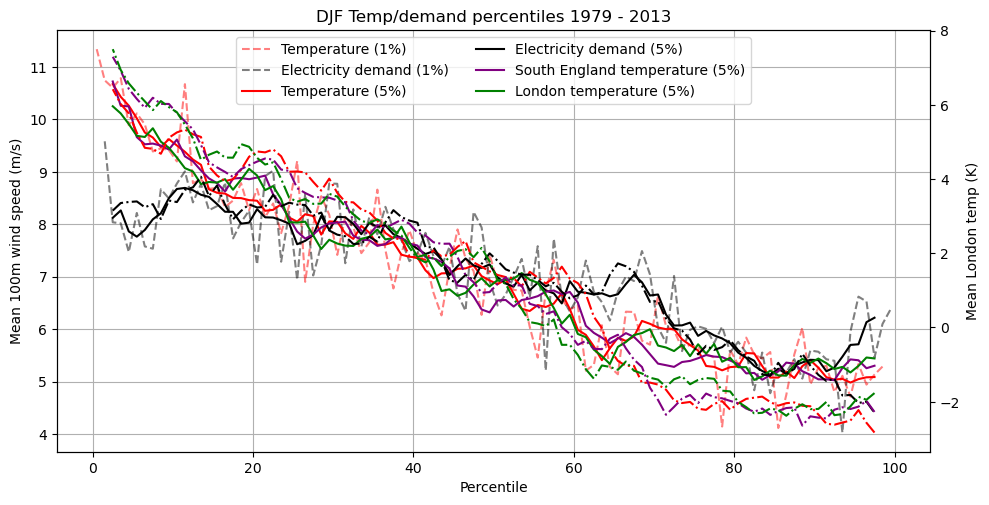

In [91]:
# do the same in a single plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

# Plot the data
ax.plot(100 - comp_djf_perc_temp_full["percentile"], comp_djf_perc_temp_full["mean_100m_wind_speed"], label="Temperature (1%)", color="red", linestyle="--", alpha=0.5)

# Plot the data
ax.plot(comp_djf_perc_elec_full["percentile"], comp_djf_perc_elec_full["mean_100m_wind_speed"], label="Electricity demand (1%)", color="k", linestyle="--", alpha=0.5)

# plot the 5% data as solid lines
# Plot the data
ax.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_100m_wind_speed"], color="red", label="Temperature (5%)")

# Plot the data
ax.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_wind_speed"], color="k", label="Electricity demand (5%)")

# plot the southe of england temperature df
ax.plot(100 - comp_djf_perc_temp_se_full_5["percentile"], comp_djf_perc_temp_se_full_5["mean_100m_wind_speed"], color="purple", label="South England temperature (5%)")

# plot the london temperature df
ax.plot(100 - comp_djf_perc_temp_london_full_5["percentile"], comp_djf_perc_temp_london_full_5["mean_100m_wind_speed"], color="green", label="London temperature (5%)")

# plot the data
# ax.plot(100 - comp_djf_perc_temp_full["percentile"], comp_djf_perc_temp_full["mean_100m_wind_speed"], color="red", label="Temperature (1%)", linestyle="--")

# duplicate the y axis
ax2 = ax.twinx()

# plot the u component of wind in blue
# Plot the data
ax2.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_100m_V_london"], color="red", label="Temperature (5%)", linestyle="-.")

# Plot the data
ax2.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_V_london"], color="k", label="Electricity demand (5%)", linestyle="-.")

# plot the south of england temperature df
ax2.plot(100 - comp_djf_perc_temp_se_full_5["percentile"], comp_djf_perc_temp_se_full_5["mean_100m_V_london"], color="purple", label="South England temperature (5%)", linestyle="-.")

# plot the london temperature df
ax2.plot(100 - comp_djf_perc_temp_london_full_5["percentile"], comp_djf_perc_temp_london_full_5["mean_100m_V_london"], color="green", label="London temperature (5%)", linestyle="-.")

# set the ylabel
ax2.set_ylabel("Mean London temp (K)")

# # include a dotdahed grey line for 0 on the second y-axis
# ax2.axhline(0, color="grey", linestyle=":")

# # plot the rolling average
# # Plot the data
# ax.plot(100 - comp_djf_perc_temp_full_rolling["percentile_rolling"], comp_djf_perc_temp_full_rolling["mean_100m_wind_speed_rolling"], color="red", label="Temperature (5%)", linestyle="--")

# # Plot the data
# ax.plot(comp_djf_perc_elec_full_rolling["percentile_rolling"], comp_djf_perc_elec_full_rolling["mean_100m_wind_speed_rolling"], color="k", label="Electricity demand (5%)", linestyle="--")

# Set the labels
ax.set_xlabel("Percentile")

# Set the labels
ax.set_ylabel("Mean 100m wind speed (m/s)")

# include gridlines
ax.grid()

# include a legend
ax.legend(loc="upper center", ncols=2)

# set a tight layout
plt.tight_layout()

# include titles
ax.set_title(f"DJF Temp/demand percentiles {min_year_comp} - {max_year_comp}")

In [59]:
# do the same in a single plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4, 6))

# Plot the data
ax.plot(100 - comp_djf_perc_temp_full["percentile"], comp_djf_perc_temp_full["mean_100m_wind_speed"], label="Temperature (1%)", color="red", linestyle="--", alpha=0.5)

# Plot the data
ax.plot(comp_djf_perc_elec_full["percentile"], comp_djf_perc_elec_full["mean_100m_wind_speed"], label="Electricity demand (1%)", color="k", linestyle="--", alpha=0.5)

# plot the 5% data as solid lines
# Plot the data
ax.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_100m_wind_speed"], color="red", label="Temperature (5%)")

# Plot the data
ax.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_wind_speed"], color="k", label="Electricity demand (5%)")

# duplicate the y axis
ax2 = ax.twinx()

# plot the u component of wind in blue
# Plot the data
ax2.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_100m_U"], color="red", label="Temperature (5%)", linestyle="-.")

# Plot the data
ax2.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_U"], color="k", label="Electricity demand (5%)", linestyle="-.")

# set the ylabel
ax2.set_ylabel("Mean 100m U wind component (m/s)")

# include a dotdahed grey line for 0 on the second y-axis
ax2.axhline(0, color="grey", linestyle=":")

# # plot the rolling average
# # Plot the data
# ax.plot(100 - comp_djf_perc_temp_full_rolling["percentile_rolling"], comp_djf_perc_temp_full_rolling["mean_100m_wind_speed_rolling"], color="red", label="Temperature (5%)", linestyle="--")

# # Plot the data
# ax.plot(comp_djf_perc_elec_full_rolling["percentile_rolling"], comp_djf_perc_elec_full_rolling["mean_100m_wind_speed_rolling"], color="k", label="Electricity demand (5%)", linestyle="--")

# Set the labels
ax.set_xlabel("Percentile")

# Set the labels
ax.set_ylabel("Mean 100m wind speed (m/s)")

# lmit the x acis between 80 and 100
ax.set_xlim(80, 100)

# limit the ylim between 3.5 and 8
ax.set_ylim(3.5, 7.5)

# include gridlines
ax.grid()

# include a legend
ax.legend()

# set a tight layout
plt.tight_layout()

# include titles
ax.set_title(f"DJF Temp/demand percentiles {min_year_comp} - {max_year_comp}")

Text(0.5, 1.0, 'DJF Temp/demand percentiles 1979 - 2013')

Text(0.5, 1.0, 'DJF Temp/demand percentiles 1979 - 2013')

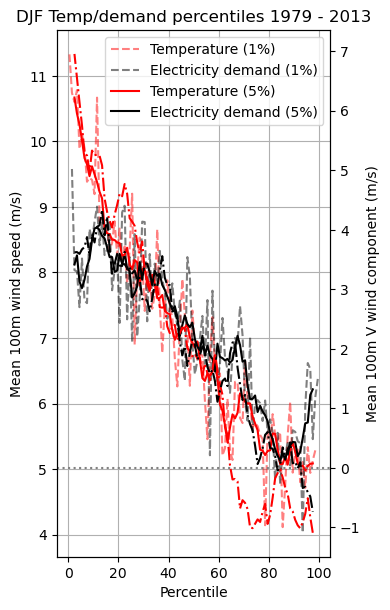

In [ ]:
# do the same in a single plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4, 6))

# Plot the data
ax.plot(100 - comp_djf_perc_temp_full["percentile"], comp_djf_perc_temp_full["mean_100m_wind_speed"], label="Temperature (1%)", color="red", linestyle="--", alpha=0.5)

# Plot the data
ax.plot(comp_djf_perc_elec_full["percentile"], comp_djf_perc_elec_full["mean_100m_wind_speed"], label="Electricity demand (1%)", color="k", linestyle="--", alpha=0.5)

# plot the 5% data as solid lines
# Plot the data
ax.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_100m_wind_speed"], color="red", label="Temperature (5%)")

# Plot the data
ax.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_wind_speed"], color="k", label="Electricity demand (5%)")

# duplicate the y axis
ax2 = ax.twinx()

# plot the u component of wind in blue
# Plot the data
ax2.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_100m_V"], color="red", label="Temperature (5%)", linestyle="-.")

# Plot the data
ax2.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_V"], color="k", label="Electricity demand (5%)", linestyle="-.")

# set the ylabel
ax2.set_ylabel("Mean 100m V wind component (m/s)")

# include a dotdahed grey line for 0 on the second y-axis
ax2.axhline(0, color="grey", linestyle=":")

# # plot the rolling average
# # Plot the data
# ax.plot(100 - comp_djf_perc_temp_full_rolling["percentile_rolling"], comp_djf_perc_temp_full_rolling["mean_100m_wind_speed_rolling"], color="red", label="Temperature (5%)", linestyle="--")

# # Plot the data
# ax.plot(comp_djf_perc_elec_full_rolling["percentile_rolling"], comp_djf_perc_elec_full_rolling["mean_100m_wind_speed_rolling"], color="k", label="Electricity demand (5%)", linestyle="--")

# Set the labels
ax.set_xlabel("Percentile")

# Set the labels
ax.set_ylabel("Mean 100m wind speed (m/s)")

# include gridlines
ax.grid()

# include a legend
ax.legend()

# set a tight layout
plt.tight_layout()

# include titles
ax.set_title(f"DJF Temp/demand percentiles {min_year_comp} - {max_year_comp}")

Text(0.5, 1.0, 'DJF Temp/demand percentiles 1979 - 2013')

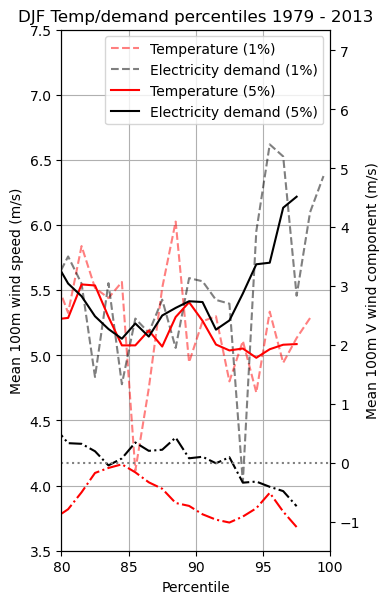

In [60]:
# do the same in a single plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4, 6))

# Plot the data
ax.plot(100 - comp_djf_perc_temp_full["percentile"], comp_djf_perc_temp_full["mean_100m_wind_speed"], label="Temperature (1%)", color="red", linestyle="--", alpha=0.5)

# Plot the data
ax.plot(comp_djf_perc_elec_full["percentile"], comp_djf_perc_elec_full["mean_100m_wind_speed"], label="Electricity demand (1%)", color="k", linestyle="--", alpha=0.5)

# plot the 5% data as solid lines
# Plot the data
ax.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_100m_wind_speed"], color="red", label="Temperature (5%)")

# Plot the data
ax.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_wind_speed"], color="k", label="Electricity demand (5%)")

# duplicate the y axis
ax2 = ax.twinx()

# plot the u component of wind in blue
# Plot the data
ax2.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_100m_V"], color="red", label="Temperature (5%)", linestyle="-.")

# Plot the data
ax2.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_V"], color="k", label="Electricity demand (5%)", linestyle="-.")

# set the ylabel
ax2.set_ylabel("Mean 100m V wind component (m/s)")

# include a dotdahed grey line for 0 on the second y-axis
ax2.axhline(0, color="grey", linestyle=":")

# # plot the rolling average
# # Plot the data
# ax.plot(100 - comp_djf_perc_temp_full_rolling["percentile_rolling"], comp_djf_perc_temp_full_rolling["mean_100m_wind_speed_rolling"], color="red", label="Temperature (5%)", linestyle="--")

# # Plot the data
# ax.plot(comp_djf_perc_elec_full_rolling["percentile_rolling"], comp_djf_perc_elec_full_rolling["mean_100m_wind_speed_rolling"], color="k", label="Electricity demand (5%)", linestyle="--")

# Set the labels
ax.set_xlabel("Percentile")

# Set the labels
ax.set_ylabel("Mean 100m wind speed (m/s)")

# lmit the x acis between 80 and 100
ax.set_xlim(80, 100)

# limit the ylim between 3.5 and 8
ax.set_ylim(3.5, 7.5)

# include gridlines
ax.grid()

# include a legend
ax.legend()

# set a tight layout
plt.tight_layout()

# include titles
ax.set_title(f"DJF Temp/demand percentiles {min_year_comp} - {max_year_comp}")

Text(0.5, 1.0, 'DJF Temp/demand percentiles 1979 - 2013')

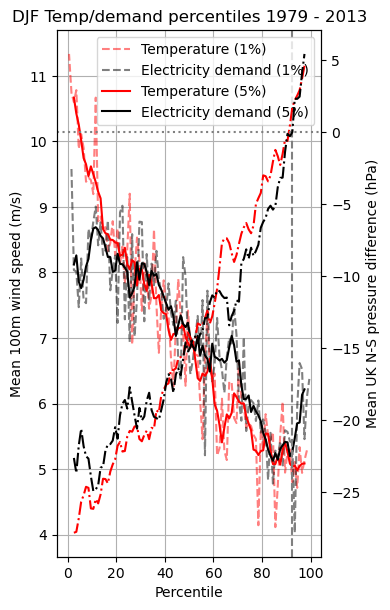

In [56]:
# do the same in a single plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4, 6))

# Plot the data
ax.plot(100 - comp_djf_perc_temp_full["percentile"], comp_djf_perc_temp_full["mean_100m_wind_speed"], label="Temperature (1%)", color="red", linestyle="--", alpha=0.5)

# Plot the data
ax.plot(comp_djf_perc_elec_full["percentile"], comp_djf_perc_elec_full["mean_100m_wind_speed"], label="Electricity demand (1%)", color="k", linestyle="--", alpha=0.5)

# plot the 5% data as solid lines
# Plot the data
ax.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_100m_wind_speed"], color="red", label="Temperature (5%)")

# Plot the data
ax.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_wind_speed"], color="k", label="Electricity demand (5%)")

# duplicate the y axis
ax2 = ax.twinx()

# plot the u component of wind in blue
# Plot the data
ax2.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_delta_p"], color="red", label="Temperature (5%)", linestyle="-.")

# Plot the data
ax2.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_delta_p"], color="k", label="Electricity demand (5%)", linestyle="-.")

# set the ylabel
ax2.set_ylabel("Mean UK N-S pressure difference (hPa)")

# include a dotdahed grey line for 0 on the second y-axis
ax2.axhline(0, color="grey", linestyle=":")

# # plot the rolling average
# # Plot the data
# ax.plot(100 - comp_djf_perc_temp_full_rolling["percentile_rolling"], comp_djf_perc_temp_full_rolling["mean_100m_wind_speed_rolling"], color="red", label="Temperature (5%)", linestyle="--")

# # Plot the data
# ax.plot(comp_djf_perc_elec_full_rolling["percentile_rolling"], comp_djf_perc_elec_full_rolling["mean_100m_wind_speed_rolling"], color="k", label="Electricity demand (5%)", linestyle="--")

# include a dahsed vertical grey line where mean delta P for electricity is 0
percentile_zero = np.where(np.min(abs(comp_djf_perc_elec_full_5["mean_delta_p"])) == abs(comp_djf_perc_elec_full_5["mean_delta_p"]))[0][0]

ax.axvline(comp_djf_perc_elec_full_5["percentile"].iloc[percentile_zero], color="grey", linestyle="--")

# Set the labels
ax.set_xlabel("Percentile")

# Set the labels
ax.set_ylabel("Mean 100m wind speed (m/s)")

# include gridlines
ax.grid()

# include a legend
ax.legend()

# set a tight layout
plt.tight_layout()

# include titles
ax.set_title(f"DJF Temp/demand percentiles {min_year_comp} - {max_year_comp}")

Text(0.5, 1.0, 'DJF Temp/demand percentiles 1979 - 2013')

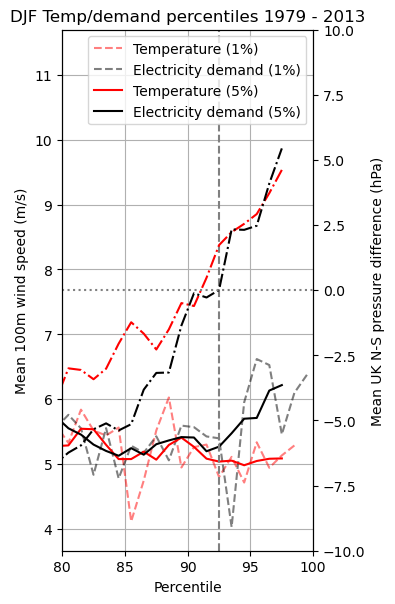

In [61]:
# do the same in a single plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4, 6))

# Plot the data
ax.plot(100 - comp_djf_perc_temp_full["percentile"], comp_djf_perc_temp_full["mean_100m_wind_speed"], label="Temperature (1%)", color="red", linestyle="--", alpha=0.5)

# Plot the data
ax.plot(comp_djf_perc_elec_full["percentile"], comp_djf_perc_elec_full["mean_100m_wind_speed"], label="Electricity demand (1%)", color="k", linestyle="--", alpha=0.5)

# plot the 5% data as solid lines
# Plot the data
ax.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_100m_wind_speed"], color="red", label="Temperature (5%)")

# Plot the data
ax.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_wind_speed"], color="k", label="Electricity demand (5%)")

# duplicate the y axis
ax2 = ax.twinx()

# plot the u component of wind in blue
# Plot the data
ax2.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_delta_p"], color="red", label="Temperature (5%)", linestyle="-.")

# Plot the data
ax2.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_delta_p"], color="k", label="Electricity demand (5%)", linestyle="-.")

# set the ylabel
ax2.set_ylabel("Mean UK N-S pressure difference (hPa)")

# include a dotdahed grey line for 0 on the second y-axis
ax2.axhline(0, color="grey", linestyle=":")

# # plot the rolling average
# # Plot the data
# ax.plot(100 - comp_djf_perc_temp_full_rolling["percentile_rolling"], comp_djf_perc_temp_full_rolling["mean_100m_wind_speed_rolling"], color="red", label="Temperature (5%)", linestyle="--")

# # Plot the data
# ax.plot(comp_djf_perc_elec_full_rolling["percentile_rolling"], comp_djf_perc_elec_full_rolling["mean_100m_wind_speed_rolling"], color="k", label="Electricity demand (5%)", linestyle="--")

# include a dahsed vertical grey line where mean delta P for electricity is 0
percentile_zero = np.where(np.min(abs(comp_djf_perc_elec_full_5["mean_delta_p"])) == abs(comp_djf_perc_elec_full_5["mean_delta_p"]))[0][0]

ax.axvline(comp_djf_perc_elec_full_5["percentile"].iloc[percentile_zero], color="grey", linestyle="--")

# Set the labels
ax.set_xlabel("Percentile")

# Set the labels
ax.set_ylabel("Mean 100m wind speed (m/s)")

# limit the x axis between 80 and 100
ax.set_xlim(80, 100)

# limit the y axis between -10 and 10
ax2.set_ylim(-10, 10)

# include gridlines
ax.grid()

# include a legend
ax.legend()

# set a tight layout
plt.tight_layout()

# include titles
ax.set_title(f"DJF Temp/demand percentiles {min_year_comp} - {max_year_comp}")

Text(0.5, 1.0, 'DJF Temp/demand percentiles 1979 - 2013')

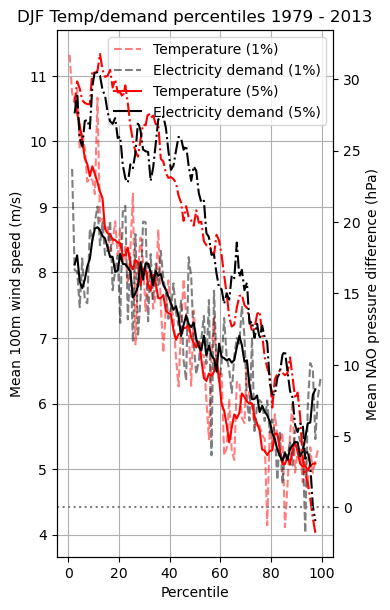

In [52]:
# do the same in a single plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4, 6))

# Plot the data
ax.plot(100 - comp_djf_perc_temp_full["percentile"], comp_djf_perc_temp_full["mean_100m_wind_speed"], label="Temperature (1%)", color="red", linestyle="--", alpha=0.5)

# Plot the data
ax.plot(comp_djf_perc_elec_full["percentile"], comp_djf_perc_elec_full["mean_100m_wind_speed"], label="Electricity demand (1%)", color="k", linestyle="--", alpha=0.5)

# plot the 5% data as solid lines
# Plot the data
ax.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_100m_wind_speed"], color="red", label="Temperature (5%)")

# Plot the data
ax.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_100m_wind_speed"], color="k", label="Electricity demand (5%)")

# duplicate the y axis
ax2 = ax.twinx()

# plot the u component of wind in blue
# Plot the data
ax2.plot(100 - comp_djf_perc_temp_full_5["percentile"], comp_djf_perc_temp_full_5["mean_nao"], color="red", label="Temperature (5%)", linestyle="-.")

# Plot the data
ax2.plot(comp_djf_perc_elec_full_5["percentile"], comp_djf_perc_elec_full_5["mean_nao"], color="k", label="Electricity demand (5%)", linestyle="-.")

# set the ylabel
ax2.set_ylabel("Mean NAO pressure difference (hPa)")

# include a dotdahed grey line for 0 on the second y-axis
ax2.axhline(0, color="grey", linestyle=":")

# # plot the rolling average
# # Plot the data
# ax.plot(100 - comp_djf_perc_temp_full_rolling["percentile_rolling"], comp_djf_perc_temp_full_rolling["mean_100m_wind_speed_rolling"], color="red", label="Temperature (5%)", linestyle="--")

# # Plot the data
# ax.plot(comp_djf_perc_elec_full_rolling["percentile_rolling"], comp_djf_perc_elec_full_rolling["mean_100m_wind_speed_rolling"], color="k", label="Electricity demand (5%)", linestyle="--")

# Set the labels
ax.set_xlabel("Percentile")

# Set the labels
ax.set_ylabel("Mean 100m wind speed (m/s)")

# include gridlines
ax.grid()

# include a legend
ax.legend()

# set a tight layout
plt.tight_layout()

# include titles
ax.set_title(f"DJF Temp/demand percentiles {min_year_comp} - {max_year_comp}")

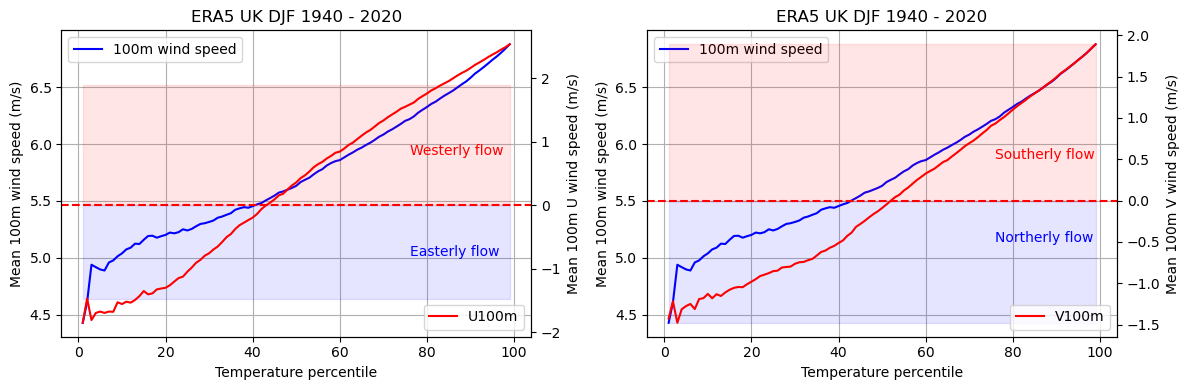

In [ ]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs2.text(76, -0.8, "Easterly flow", color="blue")

axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs3.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs3.text(76, -0.5, "Northerly flow", color="blue")

axs3.text(76, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

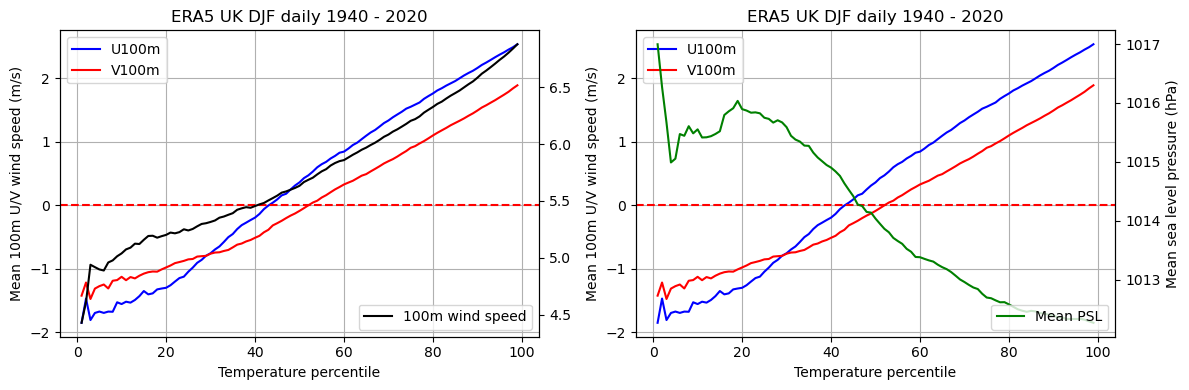

In [ ]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[0].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[0].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs2 = axs[0].twinx()

# also plot the 100m wind speed in black
axs2.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="black", label="100m wind speed")

# # highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# axs2.text(76, -0.8, "Easterly flow", color="blue")

# axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[1].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[1].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs3 = axs[1].twinx()

# also plot the 100m wind speed in black
axs3.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_psl"] / 100, color="green", label="Mean PSL")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
# axs2.set_ylabel("Mean 100m V wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean sea level pressure (hPa)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF daily {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF daily {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# # set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [ ]:
# limit the data to the hazel data years
comp_path_djf_hazel = comp_path_djf[comp_path_djf.index.year.isin(hazel_data_years)]

# set up min and max year
min_year_comp = comp_path_djf_hazel.index.year.min()
max_year_comp = comp_path_djf_hazel.index.year.max()

# set up new dataframes
comp_djf_perc_hazel = pd.DataFrame()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_path_djf_hazel["2_metre_temperature"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_path_djf_hazel[comp_path_djf_hazel["2_metre_temperature"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_days": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc_hazel = pd.concat([comp_djf_perc_hazel, comp_djf_perc_this])

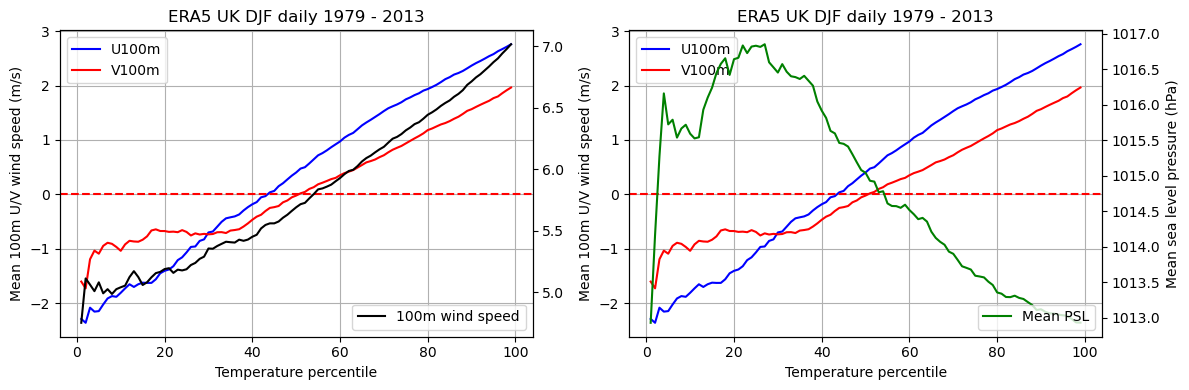

In [ ]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[0].plot(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[0].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs2 = axs[0].twinx()

# also plot the 100m wind speed in black
axs2.plot(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_wind_speed"], color="black", label="100m wind speed")

# # highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# axs2.text(76, -0.8, "Easterly flow", color="blue")

# axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[1].plot(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[1].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs3 = axs[1].twinx()

# also plot the 100m wind speed in black
axs3.plot(comp_djf_perc_hazel["percentile"], comp_djf_perc_hazel["mean_psl"] / 100, color="green", label="Mean PSL")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
# axs2.set_ylabel("Mean 100m V wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean sea level pressure (hPa)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF daily {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF daily {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# # set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [ ]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc[comp_djf_perc["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs3.text(3, -0.5, "Northerly flow", color="blue")

# axs3.text(3, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper right")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper right")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

In [ ]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc[comp_djf_perc["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

# Plot the data
# including error bars for the 5th and 95th percentiles
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="blue", label="U100m")

# # create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs.twinx()

# Plot the data
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# include labels for the axes
axs.set_xlabel("Temperature percentile")

# Set the labels
axs.set_ylabel("Mean 100m U/V wind speed (m/s)")

# include gridlines
axs.grid()

# include legend
axs.legend(loc="upper left")

# # include legend
# axs2.legend(loc="lower right")
# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# # Plot the data
# axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# # create a duplicate y-axis and plot the 100m wind speed
# axs3 = axs[1].twinx()

# # Plot the data
# axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs3.axhline(0, color="red", linestyle="--")

# # highlight the area beneath in blue
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # # highlighte the area above in red
# # axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# # axs3.text(3, -0.5, "Northerly flow", color="blue")

# # axs3.text(3, 0.5, "Southerly flow", color="red")

# # Set the labels
# axs[0].set_xlabel("Temperature percentile")

# # Set the labels
# axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# # Set the labels
# axs[1].set_xlabel("Temperature percentile")

# # Set the labels
# axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# # Include titles showing the period
# axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # Include titles showing the period
# axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # include gridlines
# axs[0].grid()

# axs[1].grid()

# # include legend in the top left
# axs[0].legend(loc="upper right")

# # include legend for axs2
# axs2.legend(loc="lower right")

# # include legend in the top left
# axs[1].legend(loc="upper right")

# # include legend for axs3
# axs3.legend(loc="lower right")

# include a title
plt.title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# set a tight layout
plt.tight_layout()

In [ ]:
# Set up the clearheads years
clearheads_years = np.arange(1950, 2020 + 1)

# subset the data to the hazel years
comp_djf_daily_hazel = comp_path_djf[comp_path_djf.index.year.isin(clearheads_years)]

# set up new dataframes
comp_djf_perc = pd.DataFrame()

# set up the min and max year
min_year_comp = comp_djf_daily_hazel.index.year.min()
max_year_comp = comp_djf_daily_hazel.index.year.max()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_djf_daily_hazel["2_metre_temperature"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_djf_daily_hazel[comp_djf_daily_hazel["2_metre_temperature"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_days": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc = pd.concat([comp_djf_perc, comp_djf_perc_this])

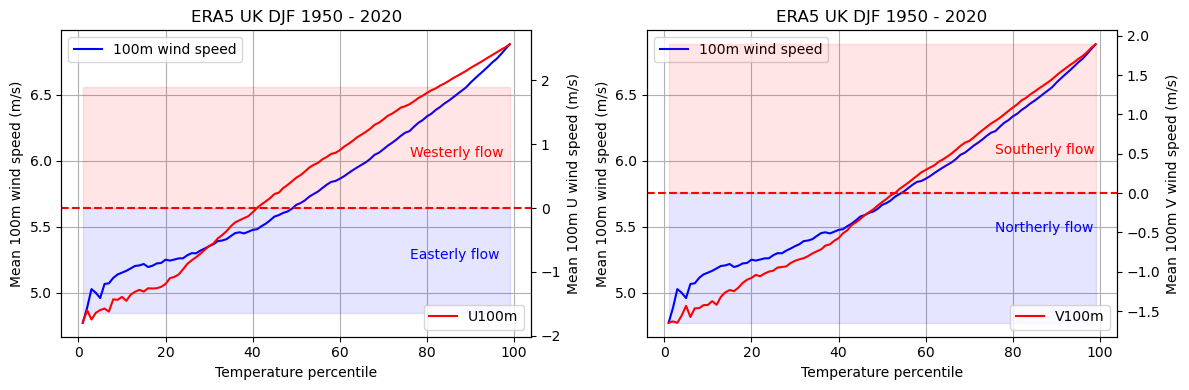

In [ ]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs2.text(76, -0.8, "Easterly flow", color="blue")

axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs3.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs3.text(76, -0.5, "Northerly flow", color="blue")

axs3.text(76, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

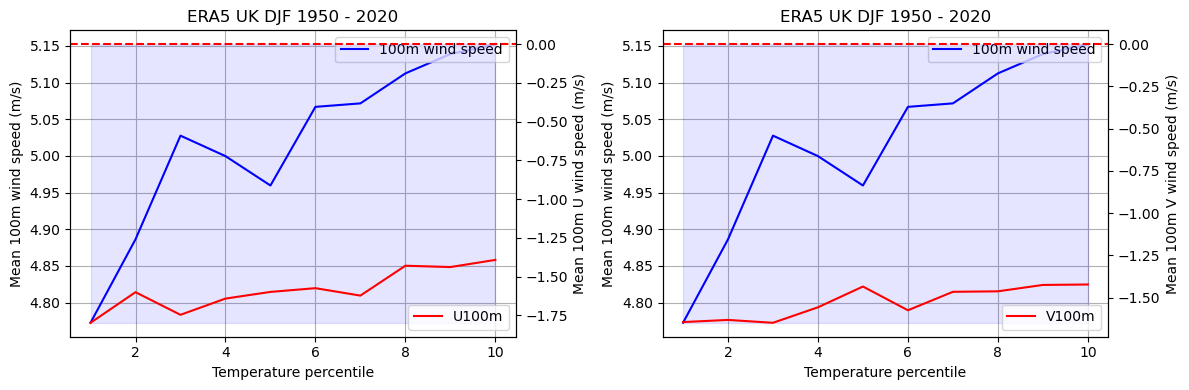

In [ ]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc[comp_djf_perc["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs3.text(3, -0.5, "Northerly flow", color="blue")

# axs3.text(3, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper right")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper right")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

In [ ]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc[comp_djf_perc["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

# Plot the data
# including error bars for the 5th and 95th percentiles
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="blue", label="U100m")

# # create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs.twinx()

# Plot the data
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# include labels for the axes
axs.set_xlabel("Temperature percentile")

# Set the labels
axs.set_ylabel("Mean 100m U/V wind speed (m/s)")

# include gridlines
axs.grid()

# include legend
axs.legend(loc="upper left")

# # include legend
# axs2.legend(loc="lower right")
# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# # Plot the data
# axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# # create a duplicate y-axis and plot the 100m wind speed
# axs3 = axs[1].twinx()

# # Plot the data
# axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs3.axhline(0, color="red", linestyle="--")

# # highlight the area beneath in blue
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # # highlighte the area above in red
# # axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# # axs3.text(3, -0.5, "Northerly flow", color="blue")

# # axs3.text(3, 0.5, "Southerly flow", color="red")

# # Set the labels
# axs[0].set_xlabel("Temperature percentile")

# # Set the labels
# axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# # Set the labels
# axs[1].set_xlabel("Temperature percentile")

# # Set the labels
# axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# # Include titles showing the period
# axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # Include titles showing the period
# axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # include gridlines
# axs[0].grid()

# axs[1].grid()

# # include legend in the top left
# axs[0].legend(loc="upper right")

# # include legend for axs2
# axs2.legend(loc="lower right")

# # include legend in the top left
# axs[1].legend(loc="upper right")

# # include legend for axs3
# axs3.legend(loc="lower right")

# include a title
plt.title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# set a tight layout
plt.tight_layout()

In [ ]:
comp_djf_perc_limited.head()

percentile   threshold  n_days  mean_10m_U  mean_10m_V  \
0           1  270.047931      65   -1.050711   -0.984607   
0           2  270.758404     129   -0.945597   -0.972598   
0           3  271.378642     193   -1.038745   -0.984572   
0           4  271.882351     257   -0.985310   -0.936589   
0           5  272.217079     321   -0.963365   -0.865151   

   mean_10m_wind_speed  mean_100m_U  05_100m_U  95_100m_U  mean_100m_V  \
0             2.794158    -1.797669  -7.097290   3.046217    -1.645060   
0             2.886444    -1.600080  -8.126860   4.376284    -1.632326   
0             2.975136    -1.746127  -8.128953   3.962627    -1.649331   
0             2.974525    -1.641387  -8.024326   4.145220    -1.557488   
0             2.951373    -1.598356  -8.006373   4.352579    -1.434621   

   05_100m_V  95_100m_V  mean_100m_wind_speed  05_100m_wind_speed  \
0  -5.726338   2.804981              4.772369            1.807867   
0  -5.735211   3.376373              4.886181            1.770403   
0  -5.907076   3.597649              5.027617            1.780511   
0  -6.118917   3.962267              4.999717            1.548340   
0  -5.986267   4.326348              4.959635            1.541846   

   95_100m_wind_speed       mean_psl        05_psl         95_psl  
0            8.840281  101528.659304  99805.665003  103533.753141  
0            9.034162  101502.185822  99851.679209  103376.513533  
0            9.093621  101453.762901  99777.511184  103266.918445  
0            9.067099  101416.410736  99556.841206  103283.917242  
0            9.056585  101461.900213  99429.849894  103303.120754

In [ ]:
# Now limit to the hazel period
comp_djf_daily_haze = comp_path_djf[comp_path_djf.index.year.isin(hazel_data_years)]

# set up new dataframes
comp_djf_perc = pd.DataFrame()

# set up the min and max year
min_year_comp = comp_djf_daily_haze.index.year.min()
max_year_comp = comp_djf_daily_haze.index.year.max()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_djf_daily_haze["2_metre_temperature"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_djf_daily_haze[comp_djf_daily_haze["2_metre_temperature"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_days": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_10m_wind_speed": [comp_djf_this["10m_wind_speed"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc = pd.concat([comp_djf_perc, comp_djf_perc_this])

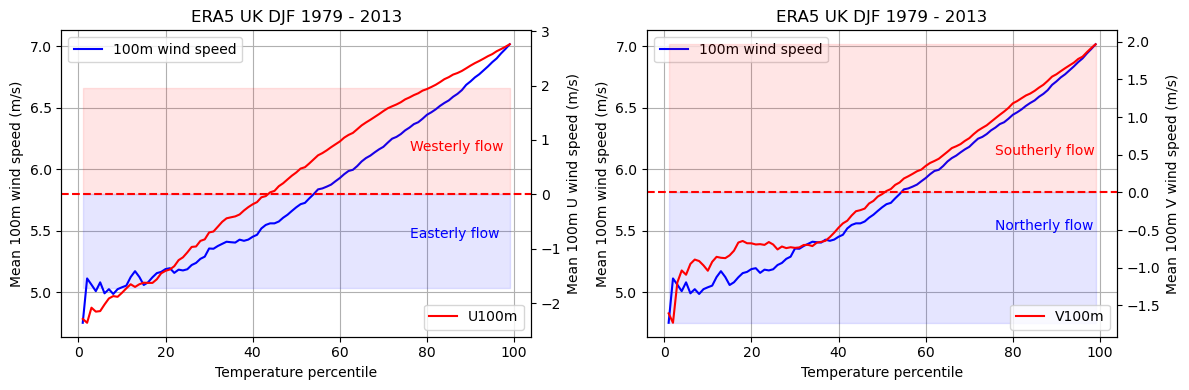

In [ ]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs2.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs2.text(76, -0.8, "Easterly flow", color="blue")

axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs3.fill_between(comp_djf_perc["percentile"], comp_djf_perc["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs3.text(76, -0.5, "Northerly flow", color="blue")

axs3.text(76, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

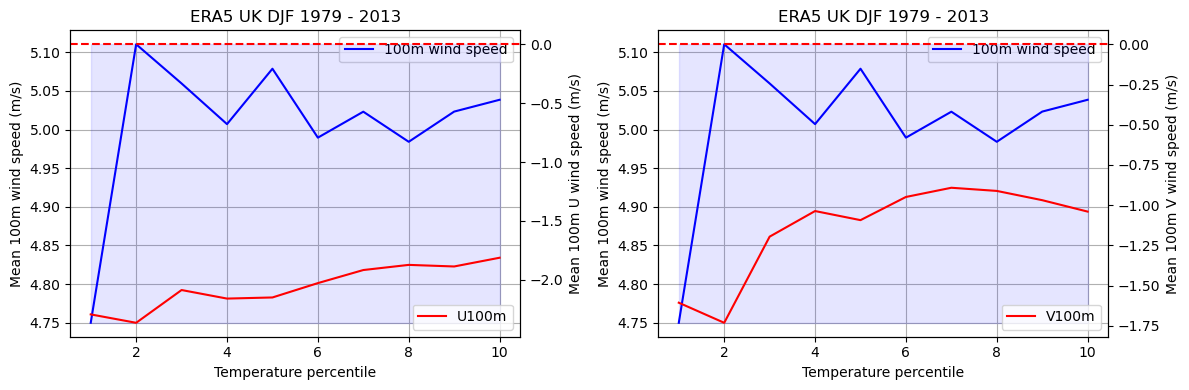

In [ ]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc[comp_djf_perc["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs3.text(3, -0.5, "Northerly flow", color="blue")

# axs3.text(3, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper right")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper right")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

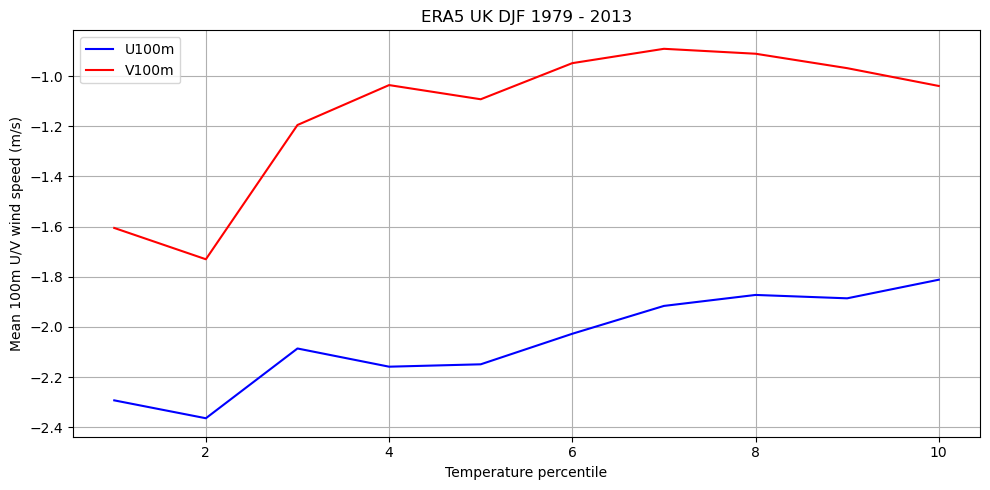

In [ ]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc[comp_djf_perc["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

# Plot the data
# including error bars for the 5th and 95th percentiles
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="blue", label="U100m")

# # create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs.twinx()

# Plot the data
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# include labels for the axes
axs.set_xlabel("Temperature percentile")

# Set the labels
axs.set_ylabel("Mean 100m U/V wind speed (m/s)")

# include gridlines
axs.grid()

# include legend
axs.legend(loc="upper left")

# # include legend
# axs2.legend(loc="lower right")
# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# # Plot the data
# axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# # create a duplicate y-axis and plot the 100m wind speed
# axs3 = axs[1].twinx()

# # Plot the data
# axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs3.axhline(0, color="red", linestyle="--")

# # highlight the area beneath in blue
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # # highlighte the area above in red
# # axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# # axs3.text(3, -0.5, "Northerly flow", color="blue")

# # axs3.text(3, 0.5, "Southerly flow", color="red")

# # Set the labels
# axs[0].set_xlabel("Temperature percentile")

# # Set the labels
# axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# # Set the labels
# axs[1].set_xlabel("Temperature percentile")

# # Set the labels
# axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# # Include titles showing the period
# axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # Include titles showing the period
# axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # include gridlines
# axs[0].grid()

# axs[1].grid()

# # include legend in the top left
# axs[0].legend(loc="upper right")

# # include legend for axs2
# axs2.legend(loc="lower right")

# # include legend in the top left
# axs[1].legend(loc="upper right")

# # include legend for axs3
# axs3.legend(loc="lower right")

# include a title
plt.title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# set a tight layout
plt.tight_layout()

In [ ]:
# do the same, but for the hourly data
comp_path_djf_hourly = comp_path[comp_path.index.month.isin([12, 1, 2])]

In [ ]:
# calculate 100m wind speed
comp_path_djf_hourly["100m_wind_speed"] = np.sqrt(
    comp_path_djf_hourly["100_metre_U_wind_component"] ** 2 + comp_path_djf_hourly["100_metre_V_wind_component"] ** 2
)

/tmp/ipykernel_1480534/2542295161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_path_djf_hourly["100m_wind_speed"] = np.sqrt(


In [ ]:
# extract the min and max years from this
min_year_comp = comp_path_djf_hourly.index.year.min()
max_year_comp = comp_path_djf_hourly.index.year.max()

# Set up new dataframes
comp_djf_perc_hourly = pd.DataFrame()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_path_djf_hourly["2_metre_temperature"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_path_djf_hourly[comp_path_djf_hourly["2_metre_temperature"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_hours": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc_hourly = pd.concat([comp_djf_perc_hourly, comp_djf_perc_this])

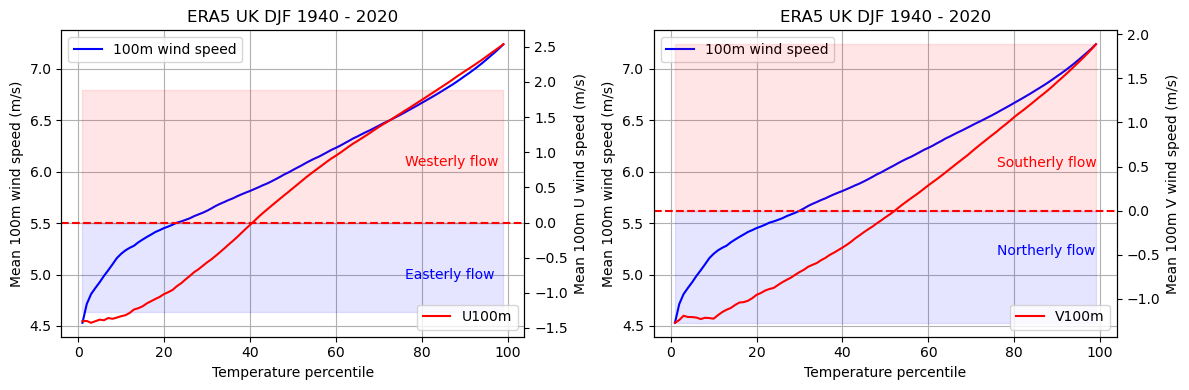

In [ ]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs2.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs2.text(76, -0.8, "Easterly flow", color="blue")

axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# highlighte the area above in red
axs3.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
axs3.text(76, -0.5, "Northerly flow", color="blue")

axs3.text(76, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

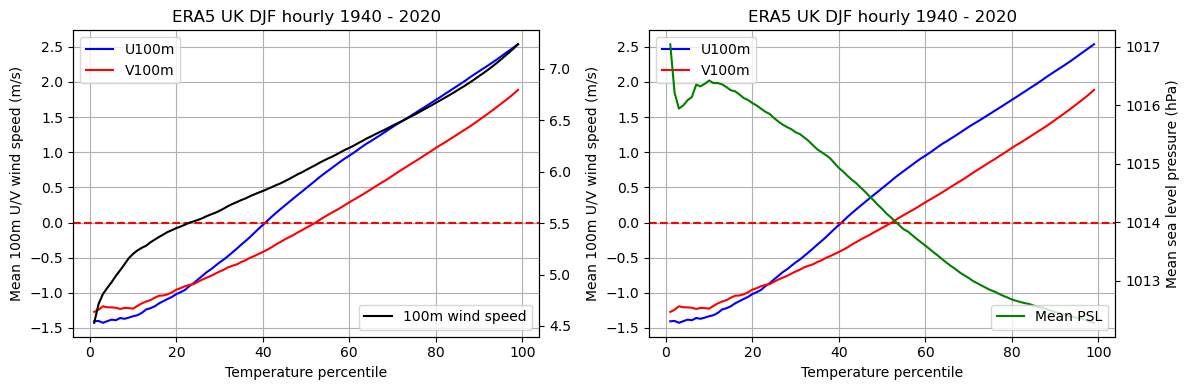

In [ ]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[0].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[0].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs2 = axs[0].twinx()

# also plot the 100m wind speed in black
axs2.plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_wind_speed"], color="black", label="100m wind speed")

# # highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# axs2.text(76, -0.8, "Easterly flow", color="blue")

# axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[1].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[1].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs3 = axs[1].twinx()

# also plot the 100m wind speed in black
axs3.plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_psl"] / 100, color="green", label="Mean PSL")


# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
# axs2.set_ylabel("Mean 100m V wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean sea level pressure (hPa)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF hourly {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF hourly {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# # set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [ ]:
# Limit the hourly data to the hazel data years
comp_djf_hourly_haze = comp_path_djf_hourly[comp_path_djf_hourly.index.year.isin(hazel_data_years)]

# Set up new dataframes
comp_djf_perc_hourly_hazel = pd.DataFrame()

# Set up the min and max year
min_year_comp = comp_djf_hourly_haze.index.year.min()
max_year_comp = comp_djf_hourly_haze.index.year.max()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_djf_hourly_haze["2_metre_temperature"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_djf_hourly_haze[comp_djf_hourly_haze["2_metre_temperature"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_hours": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc_hourly_hazel = pd.concat([comp_djf_perc_hourly_hazel, comp_djf_perc_this])

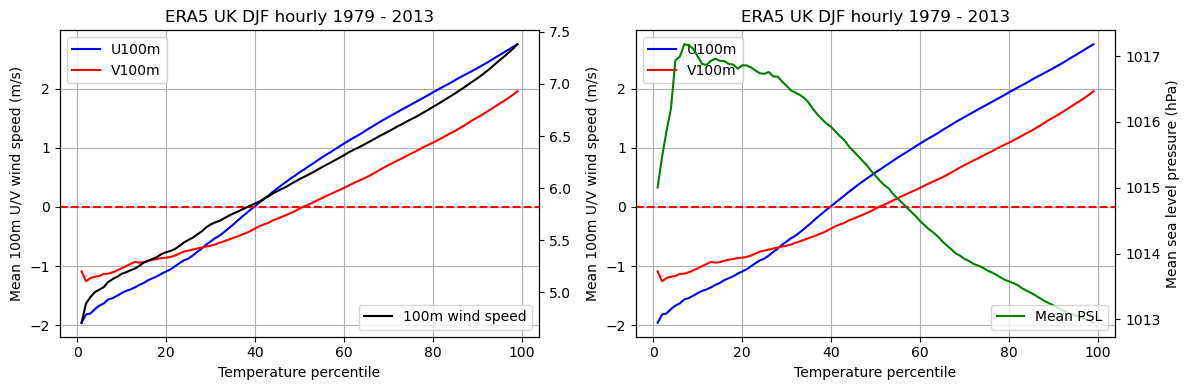

In [ ]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[0].plot(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[0].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs2 = axs[0].twinx()

# also plot the 100m wind speed in black
axs2.plot(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_wind_speed"], color="black", label="100m wind speed")

# # highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# axs2.text(76, -0.8, "Easterly flow", color="blue")

# axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[1].plot(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[1].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs3 = axs[1].twinx()

# also plot the 100m wind speed in black
axs3.plot(comp_djf_perc_hourly_hazel["percentile"], comp_djf_perc_hourly_hazel["mean_psl"] / 100, color="green", label="Mean PSL")


# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
# axs2.set_ylabel("Mean 100m V wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean sea level pressure (hPa)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF hourly {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF hourly {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# # set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [ ]:
# Does the answer change if we detrend the temperature data?
from scipy import signal

# detrend the data
comp_path_djf_hourly["2_metre_temperature_dt"] = signal.detrend(comp_path_djf_hourly["2_metre_temperature"])

# Set up new dataframes
comp_djf_perc_hourly_dt = pd.DataFrame()

# set up the min and max years
min_year_comp = comp_path_djf_hourly.index.year.min()
max_year_comp = comp_path_djf_hourly.index.year.max()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_path_djf_hourly["2_metre_temperature_dt"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_path_djf_hourly[comp_path_djf_hourly["2_metre_temperature_dt"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_hours": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc_hourly_dt = pd.concat([comp_djf_perc_hourly_dt, comp_djf_perc_this])

/tmp/ipykernel_1480534/1598770506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_path_djf_hourly["2_metre_temperature_dt"] = signal.detrend(comp_path_djf_hourly["2_metre_temperature"])


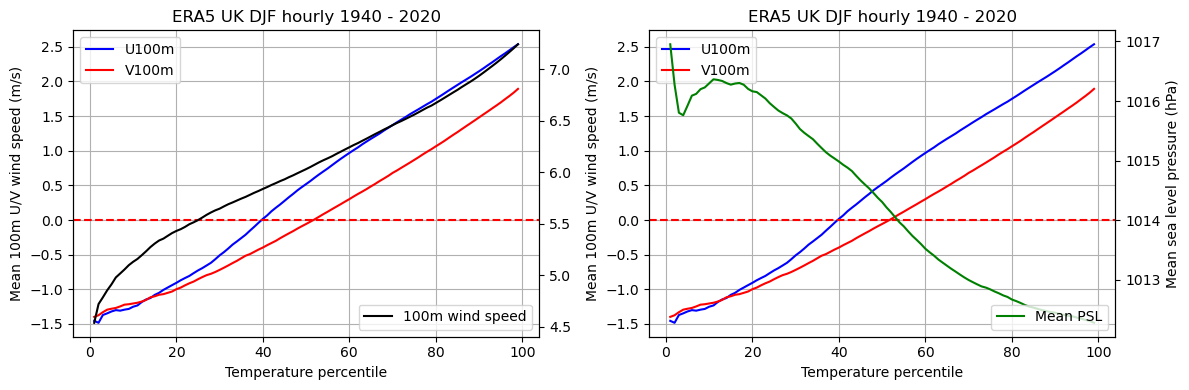

In [ ]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[0].plot(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[0].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs2 = axs[0].twinx()

# also plot the 100m wind speed in black
axs2.plot(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_wind_speed"], color="black", label="100m wind speed")

# # highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# axs2.text(76, -0.8, "Easterly flow", color="blue")

# axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[1].plot(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[1].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs3 = axs[1].twinx()

# also plot the 100m wind speed in black
axs3.plot(comp_djf_perc_hourly_dt["percentile"], comp_djf_perc_hourly_dt["mean_psl"] / 100, color="green", label="Mean PSL")


# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
# axs2.set_ylabel("Mean 100m V wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean sea level pressure (hPa)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF hourly {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF hourly {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# # set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [ ]:
# Limit the detrended dataset to the hazel data years
comp_path_djf_hourly_hazel_dt = comp_path_djf_hourly[comp_path_djf_hourly.index.year.isin(hazel_data_years)]

# Set up min and max years
min_year_comp_hazel = comp_path_djf_hourly_hazel_dt.index.year.min()
max_year_comp_hazel = comp_path_djf_hourly_hazel_dt.index.year.max()

# Set up new dataframes
comp_djf_perc_hourly_hazel_dt = pd.DataFrame()

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# Loop over the percentiles
for percentile in percentiles:
    # Find the percentile for hannah ch
    tas_percentile_this_comp = comp_path_djf_hourly_hazel_dt["2_metre_temperature_dt"].quantile(percentile / 100)

    # Subset the df to where temperature is below this threshold
    comp_djf_this = comp_path_djf_hourly_hazel_dt[comp_path_djf_hourly_hazel_dt["2_metre_temperature_dt"] < tas_percentile_this_comp]

    # Set up a new dataframe
    comp_djf_perc_this = pd.DataFrame(
        {
            "percentile": [percentile],
            "threshold": [tas_percentile_this_comp],
            "n_hours": [comp_djf_this.shape[0]],
            "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
            "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
            "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
            "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
            "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
            "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
            "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
            "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
            "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
            "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
            "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
            "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
            "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
            "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
        }
    )

    # Concat these dataframes
    comp_djf_perc_hourly_hazel_dt = pd.concat([comp_djf_perc_hourly_hazel_dt, comp_djf_perc_this])

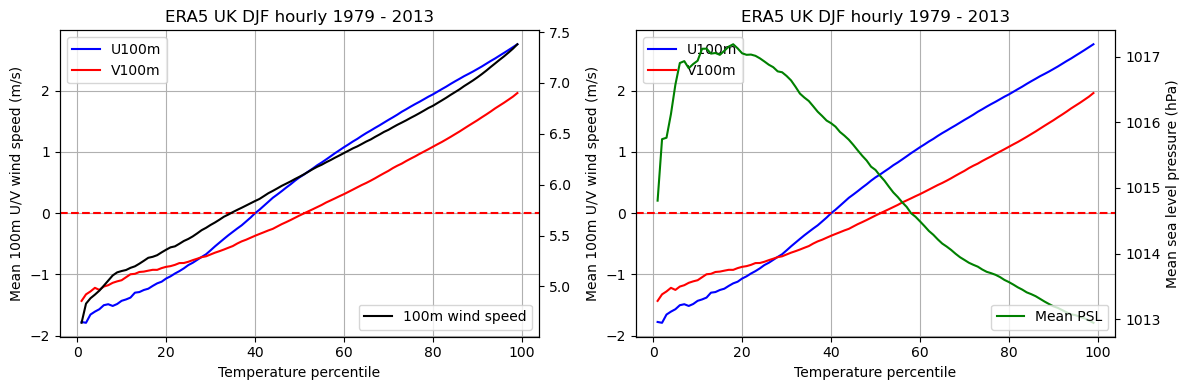

In [ ]:
# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[0].plot(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[0].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs2 = axs[0].twinx()

# also plot the 100m wind speed in black
axs2.plot(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_wind_speed"], color="black", label="100m wind speed")

# # highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# axs2.text(76, -0.8, "Easterly flow", color="blue")

# axs2.text(76, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_U"], color="blue", label="U100m")

# create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs[0].twinx()

# Plot the data
axs[1].plot(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs[1].axhline(0, color="red", linestyle="--")

# deuplicate the y-axis
axs3 = axs[1].twinx()

# also plot the 100m wind speed in black
axs3.plot(comp_djf_perc_hourly_hazel_dt["percentile"], comp_djf_perc_hourly_hazel_dt["mean_psl"] / 100, color="green", label="Mean PSL")


# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
# axs2.set_ylabel("Mean 100m V wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m U/V wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean sea level pressure (hPa)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF hourly {min_year_comp_hazel} - {max_year_comp_hazel}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF hourly {min_year_comp_hazel} - {max_year_comp_hazel}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper left")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper left")

# include legend for axs3
axs3.legend(loc="lower right")

# # set a tight layout
plt.tight_layout()

# show the plots
plt.show()

In [ ]:
# set up decades for ERA5
decades = np.arange(1940, 2020, 10)

# print the decades
print(decades)

# create a list of lists for the years in eahc decade
# e.g. for 1940s, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949
decade_years = [[year for year in range(decade, decade + 10)] for decade in decades]

print(decade_years)

# Set up the percentiles
percentiles = np.arange(1, 99 + 1, 1)

# set up an empty list for the dataframes
decade_dfs = []

# loop over the decade years
for years_this in decade_years:
    # Subset the data to these years
    comp_path_djf_hourly_this = comp_path_djf_hourly[comp_path_djf_hourly.index.year.isin(years_this)]

    # Set up new dataframe
    comp_djf_perc_hourly_this = pd.DataFrame()

    # Loop over the percentiles
    for percentile in percentiles:
        # Find the percentile for hannah ch
        tas_percentile_this_comp = comp_path_djf_hourly_this["2_metre_temperature"].quantile(percentile / 100)

        # Subset the df to where temperature is below this threshold
        comp_djf_this = comp_path_djf_hourly_this[comp_path_djf_hourly_this["2_metre_temperature"] < tas_percentile_this_comp]

        # Set up a new dataframe
        comp_djf_perc_this = pd.DataFrame(
            {
                "percentile": [percentile],
                "threshold": [tas_percentile_this_comp],
                "n_hours": [comp_djf_this.shape[0]],
                "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
                "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
                "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
                "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
                "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
                "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
                "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
                "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
                "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
                "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
                "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
                "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
                "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
                "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
            }
        )

        # Concat these dataframes
        comp_djf_perc_hourly_this = pd.concat([comp_djf_perc_hourly_this, comp_djf_perc_this])

    # Append the dataframe to the list
    decade_dfs.append(comp_djf_perc_hourly_this)

[1940 1950 1960 1970 1980 1990 2000 2010]
[[1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949], [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959], [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969], [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979], [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989], [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999], [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]]


In [ ]:
len(decade_dfs)

8

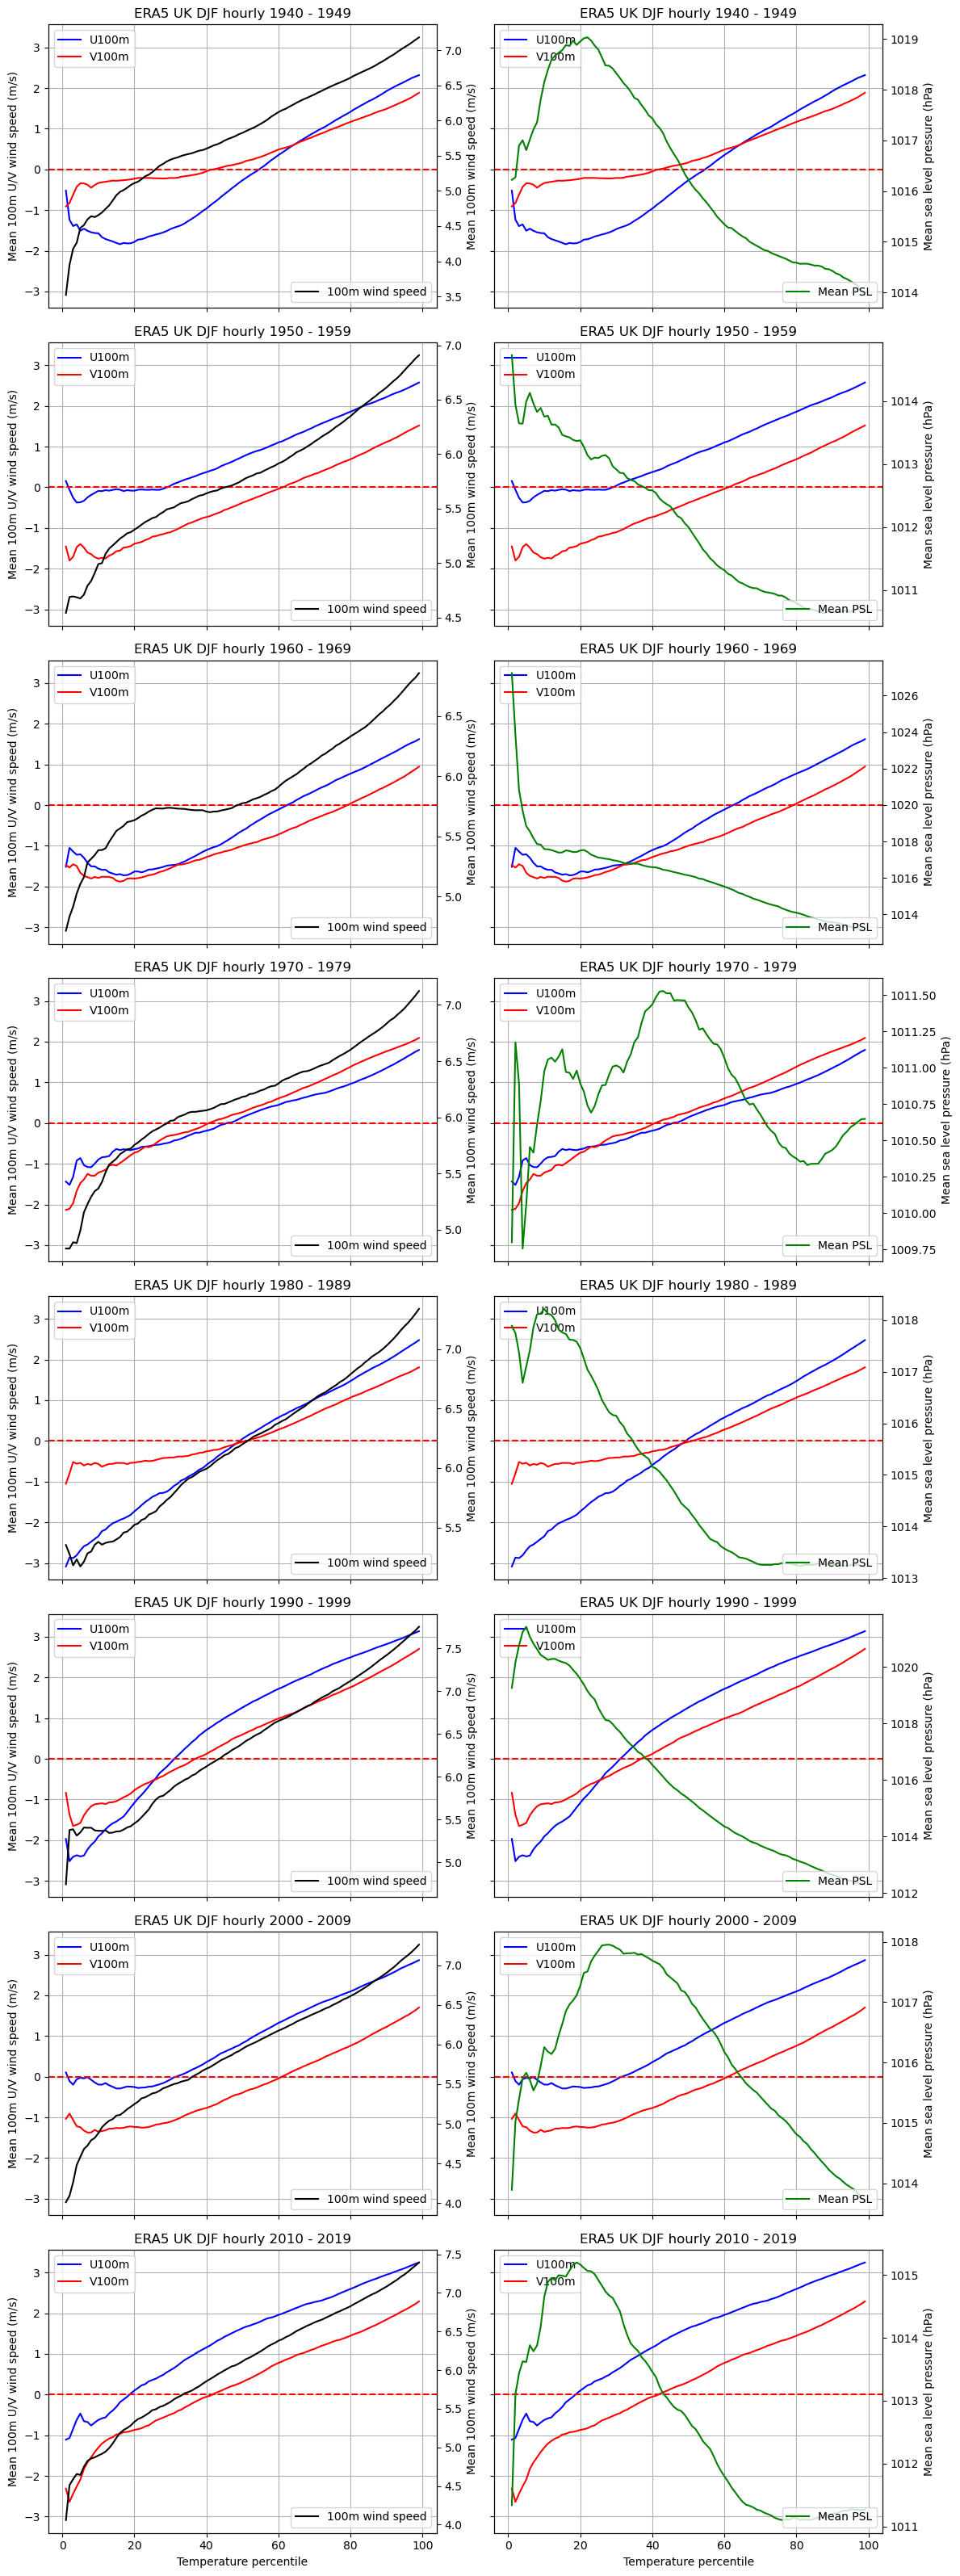

In [ ]:
# Set up the subplots
fig, axs = plt.subplots(ncols=2, nrows=8, figsize=(12, 32), sharey=True, sharex=True)

# Loop over the dataframes
for df, years_this in zip(decade_dfs, decade_years):
    # Find the index of the current dataframe
    idx = decade_years.index(years_this)

    # Plot the data
    axs[idx, 0].plot(df["percentile"], df["mean_100m_U"], color="blue", label="U100m")

    # plot the V100m data
    axs[idx, 0].plot(df["percentile"], df["mean_100m_V"], color="red", label="V100m")

    # mark the zero line as a reference
    # dashed
    axs[idx, 0].axhline(0, color="red", linestyle="--")

    # create a duplicate y-axis and plot the 100m wind speed
    axs2 = axs[idx, 0].twinx()

    # Plot the data
    axs2.plot(df["percentile"], df["mean_100m_wind_speed"], color="black", label="100m wind speed")

    # Plot the data
    axs[idx, 1].plot(df["percentile"], df["mean_100m_U"], color="blue", label="U100m")

    # Plot the v data
    axs[idx, 1].plot(df["percentile"], df["mean_100m_V"], color="red", label="V100m")

    # MArk the zero line as a reference
    # dashed
    axs[idx, 1].axhline(0, color="red", linestyle="--")

    # create a duplicate y-axis and plot the 100m wind speed
    axs3 = axs[idx, 1].twinx()

    # Plot the data
    axs3.plot(df["percentile"], df["mean_psl"] / 100, color="green", label="Mean PSL")

    # if the index is the last one
    if idx == len(decade_years) - 1:
        # Set the labels
        axs[idx, 0].set_xlabel("Temperature percentile")
        
        # Set the labels
        axs[idx, 1].set_xlabel("Temperature percentile")

    # Set the labels
    axs[idx, 0].set_ylabel("Mean 100m U/V wind speed (m/s)")

    # Set the labels
    axs2.set_ylabel("Mean 100m wind speed (m/s)")

    # # Set the labels
    # axs[idx, 1].set_ylabel("Mean 100m U/V wind speed (m/s)")

    # Set the labels
    axs3.set_ylabel("Mean sea level pressure (hPa)")

    # Include titles showing the period
    axs[idx, 0].set_title(f"ERA5 UK DJF hourly {years_this[0]} - {years_this[-1]}")

    # Include titles showing the period
    axs[idx, 1].set_title(f"ERA5 UK DJF hourly {years_this[0]} - {years_this[-1]}")

    # include gridlines
    axs[idx, 0].grid()

    # include gridlines
    axs[idx, 1].grid()

    # include legend in the top left
    axs[idx, 0].legend(loc="upper left")

    # include legend for axs2
    axs2.legend(loc="lower right")

    # include legend in the top left
    axs[idx, 1].legend(loc="upper left")

    # include legend for axs3
    axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()

## Relationship between NAO and temp/wind ##

Cheat by grabbing the observed monthly NAO values from NOAA.

Then repeat the same graph for positive and negative NAO winters.

In [ ]:
# set up the path to the .txt file
nao_file_path = "/home/users/benhutch/unseen_multi_year/dfs/norm.nao.monthly.b5001.current.ascii.table.txt"

# load in the file
nao = pd.read_csv(nao_file_path, delim_whitespace=True, header=0, index_col=0)

/tmp/ipykernel_1480534/1367832627.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  nao = pd.read_csv(nao_file_path, delim_whitespace=True, header=0, index_col=0)


In [ ]:
nao.head()

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1950  0.92  0.40 -0.36  0.73 -0.59 -0.06 -1.26 -0.05  0.25  0.85 -1.26 -1.02
1951  0.08  0.70 -1.02 -0.22 -0.59 -1.64  1.37 -0.22 -1.36  1.87 -0.39  1.32
1952  0.93 -0.83 -1.49  1.01 -1.12 -0.40 -0.09 -0.28 -0.54 -0.73 -1.13 -0.43
1953  0.33 -0.49 -0.04 -1.67 -0.66  1.09  0.40 -0.71 -0.35  1.32  1.04 -0.47
1954  0.37  0.74 -0.83  1.34 -0.09 -0.25 -0.60 -1.90 -0.44  0.60  0.40  0.69

In [ ]:
# Unpivot the DataFrame
nao_reset = nao.reset_index().melt(id_vars='index', var_name='Month', value_name='Value')

In [ ]:
nao_reset.tail()

index Month  Value
907   2021   Dec   0.29
908   2022   Dec  -0.15
909   2023   Dec   1.94
910   2024   Dec   1.21
911   2025   Dec    NaN

In [ ]:
# Create a datetime index
nao_reset['Date'] = pd.to_datetime(nao_reset['index'].astype(str) + '-' + nao_reset['Month'], format='%Y-%b')

# Set the datetime index
nao_time_series = nao_reset.set_index('Date').sort_index()

# Drop the now redundant columns
nao_time_series = nao_time_series.drop(columns=['index', 'Month'])

# Display the resulting time series
print(nao_time_series.head())

            Value
Date             
1950-01-01   0.92
1950-02-01   0.40
1950-03-01  -0.36
1950-04-01   0.73
1950-05-01  -0.59


In [ ]:
# subset to only DJF months
nao_djf = nao_time_series[nao_time_series.index.month.isin([12, 1, 2])]

In [ ]:
# create a new column for the effective dec year
def create_effective_dec_year(row):
    # Find the month
    month = row.name.month

    # Find the year
    year = row.name.year

    # If the month is 1, 2 or 3
    if month in [1, 2]:
        # Return the year minus 1
        return year - 1
    else:
        # Otherwise return the year
        return year

# Apply the function to the time series nao_djf
nao_djf['effective_dec_year'] = nao_djf.apply(create_effective_dec_year, axis=1)

/tmp/ipykernel_1480534/149227485.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nao_djf['effective_dec_year'] = nao_djf.apply(create_effective_dec_year, axis=1)


In [ ]:
nao_djf.head()

Value  effective_dec_year
Date                                 
1950-01-01   0.92                1949
1950-02-01   0.40                1949
1950-12-01  -1.02                1950
1951-01-01   0.08                1950
1951-02-01   0.70                1950

In [ ]:
# grouupby the effective dec year, set the index to the effective dec year and find the mean
nao_djf_decade = nao_djf.groupby('effective_dec_year').mean()

In [ ]:
nao_djf_decade.head()

Value
effective_dec_year          
1949                0.660000
1950               -0.080000
1951                0.473333
1952               -0.196667
1953                0.213333

In [ ]:
# set up nao +ve, nao -ve and nao neutral in a new column
for row in nao_djf_decade.itertuples():
    if row.Value > 0.40:
        nao_djf_decade.loc[row.Index, 'nao_phase'] = 'nao_positive'
    elif row.Value < -0.40:
        nao_djf_decade.loc[row.Index, 'nao_phase'] = 'nao_negative'
    else:
        nao_djf_decade.loc[row.Index, 'nao_phase'] = 'nao_neutral'

In [ ]:
# apply the effective dec year function to comp_path_djf_hourly
comp_path_djf_hourly['effective_dec_year'] = comp_path_djf_hourly.apply(create_effective_dec_year, axis=1)

/tmp/ipykernel_1480534/1456737165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_path_djf_hourly['effective_dec_year'] = comp_path_djf_hourly.apply(create_effective_dec_year, axis=1)


In [ ]:
# loop over the unique years in the effective dec year column in comp_path_djf_hourly
for year in comp_path_djf_hourly['effective_dec_year'].unique():
    # if the year is not in nao_djf_decade
    if year not in nao_djf_decade.index:
        # Continue
        continue

    # find the nao phase for this year
    nao_phase_this = nao_djf_decade.loc[year, 'nao_phase']

    # set the nao phase for this year in comp_path_djf_hourly
    comp_path_djf_hourly.loc[comp_path_djf_hourly['effective_dec_year'] == year, 'nao_phase'] = nao_phase_this

/tmp/ipykernel_1480534/1778604771.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_path_djf_hourly.loc[comp_path_djf_hourly['effective_dec_year'] == year, 'nao_phase'] = nao_phase_this


In [ ]:
# set up an empty list to append the dfs to
nao_dfs = []

# loop over the unique nao phases
for nao_phase in comp_path_djf_hourly['nao_phase'].unique():
    # subset the data to this nao phase
    comp_path_djf_hourly_this = comp_path_djf_hourly[comp_path_djf_hourly['nao_phase'] == nao_phase]

    # Set up new dataframe
    comp_djf_perc_hourly_this = pd.DataFrame()

    # Loop over the percentiles
    for percentile in percentiles:
        # Find the percentile for hannah ch
        tas_percentile_this_comp = comp_path_djf_hourly_this["2_metre_temperature"].quantile(percentile / 100)

        # Subset the df to where temperature is below this threshold
        comp_djf_this = comp_path_djf_hourly_this[comp_path_djf_hourly_this["2_metre_temperature"] < tas_percentile_this_comp]

        # Set up a new dataframe
        comp_djf_perc_this = pd.DataFrame(
            {
                "percentile": [percentile],
                "threshold": [tas_percentile_this_comp],
                "n_hours": [comp_djf_this.shape[0]],
                "mean_10m_U": [comp_djf_this["10_metre_U_wind_component"].mean()],
                "mean_10m_V": [comp_djf_this["10_metre_V_wind_component"].mean()],
                "mean_100m_U": [comp_djf_this["100_metre_U_wind_component"].mean()],
                "05_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.05)],
                "95_100m_U": [comp_djf_this["100_metre_U_wind_component"].quantile(0.95)],
                "mean_100m_V": [comp_djf_this["100_metre_V_wind_component"].mean()],
                "05_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.05)],
                "95_100m_V": [comp_djf_this["100_metre_V_wind_component"].quantile(0.95)],
                "mean_100m_wind_speed": [comp_djf_this["100m_wind_speed"].mean()],
                "05_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.05)],
                "95_100m_wind_speed": [comp_djf_this["100m_wind_speed"].quantile(0.95)],
                "mean_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].mean()],
                "05_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.05)],
                "95_psl": [comp_djf_this["air_pressure_at_mean_sea_level"].quantile(0.95)],
            }
        )

        # Concat these dataframes
        comp_djf_perc_hourly_this = pd.concat([comp_djf_perc_hourly_this, comp_djf_perc_this])

    # Append the dataframe to the list
    nao_dfs.append(comp_djf_perc_hourly_this)

In [ ]:
comp_path_djf_hourly["nao_phase"].unique()

array(['nao_positive', 'nao_neutral', 'nao_negative'], dtype=object)

In [ ]:
comp_path_djf_hourly["nao_phase"].unique()

array(['nao_positive', 'nao_neutral', 'nao_negative'], dtype=object)

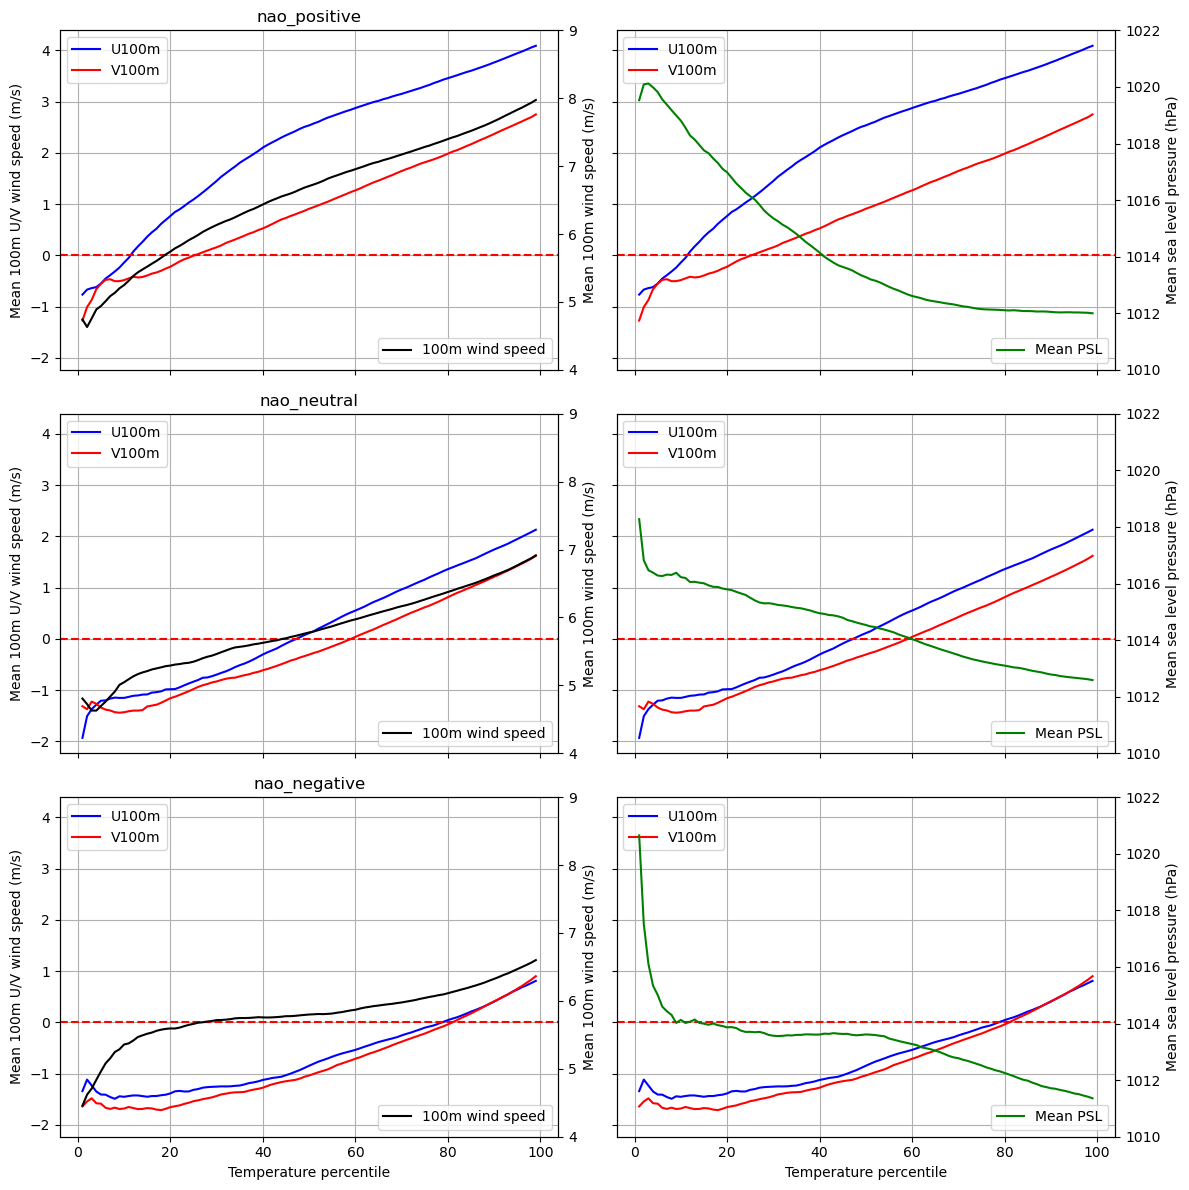

In [ ]:
# Set up the subplots
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(12, 12), sharey=True, sharex=True)

# Loop over the dataframes
for df, nao_phase in zip(nao_dfs, comp_path_djf_hourly["nao_phase"].unique()):
    # Find the index of the current dataframe
    idx = comp_path_djf_hourly['nao_phase'].unique().tolist().index(nao_phase)

    # Plot the data
    axs[idx, 0].plot(df["percentile"], df["mean_100m_U"], color="blue", label="U100m")

    # plot the V100m data
    axs[idx, 0].plot(df["percentile"], df["mean_100m_V"], color="red", label="V100m")

    # mark the zero line as a reference
    # dashed
    axs[idx, 0].axhline(0, color="red", linestyle="--")

    # create a duplicate y-axis and plot the 100m wind speed
    axs2 = axs[idx, 0].twinx()

    # Plot the data
    axs2.plot(df["percentile"], df["mean_100m_wind_speed"], color="black", label="100m wind speed")

    # Plot the data
    axs[idx, 1].plot(df["percentile"], df["mean_100m_U"], color="blue", label="U100m")

    # Plot the v data
    axs[idx, 1].plot(df["percentile"], df["mean_100m_V"], color="red", label="V100m")

    # MArk the zero line as a reference
    # dashed
    axs[idx, 1].axhline(0, color="red", linestyle="--")

    # create a duplicate y-axis and plot the 100m wind speed
    axs3 = axs[idx, 1].twinx()

    # Plot the data
    axs3.plot(df["percentile"], df["mean_psl"] / 100, color="green", label="Mean PSL")

    # if the index is the last one
    if idx == len(comp_path_djf_hourly['nao_phase'].unique()) - 1:
        # Set the labels
        axs[idx, 0].set_xlabel("Temperature percentile")
        
        # Set the labels
        axs[idx, 1].set_xlabel("Temperature percentile")

    # Set the labels
    axs[idx, 0].set_ylabel("Mean 100m U/V wind speed (m/s)")

    # Set up the title
    axs[idx, 0].set_title(f"{nao_phase}")

    # Set the labels
    axs2.set_ylabel("Mean 100m wind speed (m/s)")

    # # Set the labels
    # axs[idx, 1].set_ylabel("Mean 100m U/V wind speed (m/s)")

    # Set the labels
    axs3.set_ylabel("Mean sea level pressure (hPa)")

    # Set u the gridlines
    axs[idx, 0].grid()

    # Set u the gridlines
    axs[idx, 1].grid()

    # include legend in the top left
    axs[idx, 0].legend(loc="upper left")

    # include legend for axs2
    axs2.legend(loc="lower right")

    # include legend in the top left
    axs[idx, 1].legend(loc="upper left")

    # include legend for axs3
    axs3.legend(loc="lower right")

    # set the ylim for axs as 1010 to 1022
    axs3.set_ylim(1010, 1022)

    # set the ylim for axs2 as 4 to 8
    axs2.set_ylim(4, 9)

# set a tight layout
plt.tight_layout()

# show the plots
plt.show()


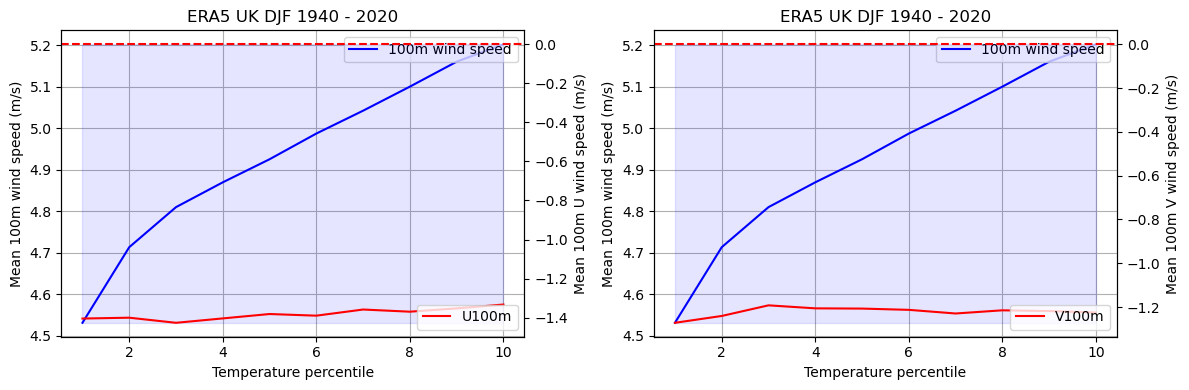

In [ ]:
# limit to the 1st to 10the percentiles
comp_djf_perc_hourly = comp_djf_perc_hourly[comp_djf_perc_hourly["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# Plot the data
axs[0].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs2 = axs[0].twinx()

# Plot the data
axs2.plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_U"], color="red", label="U100m")

# mark the zero line as a reference
# dashed
axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs2.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# Plot the data
axs[1].plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# create a duplicate y-axis and plot the 100m wind speed
axs3 = axs[1].twinx()

# Plot the data
axs3.plot(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"], color="red", label="V100m")

# mark the zero line as a reference
# dashed
axs3.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
axs3.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # highlighte the area above in red
# axs3.fill_between(comp_djf_perc_hourly["percentile"], comp_djf_perc_hourly["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs3.text(3, -0.5, "Northerly flow", color="blue")

# axs3.text(3, 0.5, "Southerly flow", color="red")

# Set the labels
axs[0].set_xlabel("Temperature percentile")

# Set the labels
axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# Set the labels
axs[1].set_xlabel("Temperature percentile")

# Set the labels
axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# Set the labels
axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# Include titles showing the period
axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# Include titles showing the period
axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# include gridlines
axs[0].grid()

axs[1].grid()

# include legend in the top left
axs[0].legend(loc="upper right")

# include legend for axs2
axs2.legend(loc="lower right")

# include legend in the top left
axs[1].legend(loc="upper right")

# include legend for axs3
axs3.legend(loc="lower right")

# set a tight layout
plt.tight_layout()

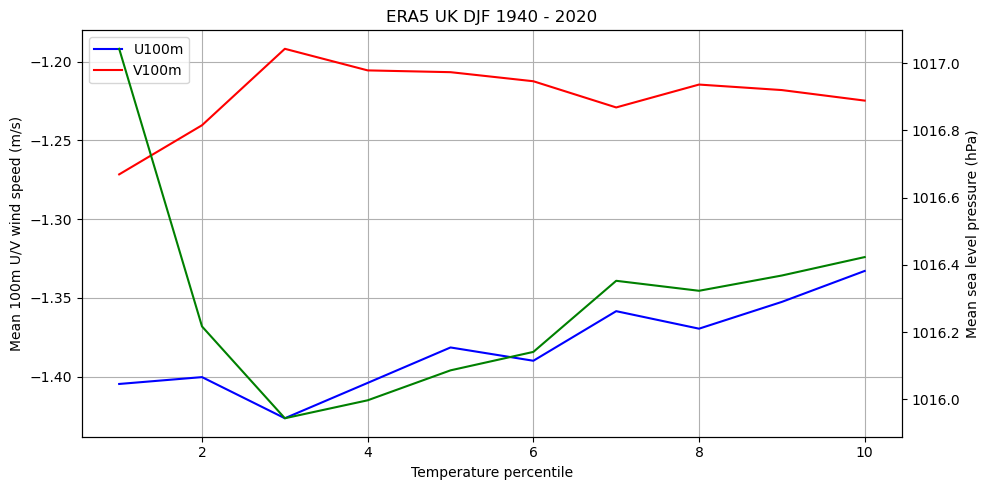

In [ ]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc_hourly[comp_djf_perc_hourly["percentile"].isin(np.arange(1, 10 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

# Plot the data
# including error bars for the 5th and 95th percentiles
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="blue", label="U100m")

# # create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs.twinx()

# Plot the data
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")


# add a second y-axis
axs2 = axs.twinx()

# include the mean sea level pressure
axs2.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_psl"] / 100, color="green", label="Mean PSL")

# Set the label for the y axis
axs2.set_ylabel("Mean sea level pressure (hPa)")

# # mark the zero line as a reference
# # dashed
# axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# include labels for the axes
axs.set_xlabel("Temperature percentile")

# Set the labels
axs.set_ylabel("Mean 100m U/V wind speed (m/s)")

# include gridlines
axs.grid()

# include legend
axs.legend(loc="upper left")

# # include legend
# axs2.legend(loc="lower right")
# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# # Plot the data
# axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# # create a duplicate y-axis and plot the 100m wind speed
# axs3 = axs[1].twinx()

# # Plot the data
# axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs3.axhline(0, color="red", linestyle="--")

# # highlight the area beneath in blue
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # # highlighte the area above in red
# # axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# # axs3.text(3, -0.5, "Northerly flow", color="blue")

# # axs3.text(3, 0.5, "Southerly flow", color="red")

# # Set the labels
# axs[0].set_xlabel("Temperature percentile")

# # Set the labels
# axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# # Set the labels
# axs[1].set_xlabel("Temperature percentile")

# # Set the labels
# axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# # Include titles showing the period
# axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # Include titles showing the period
# axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # include gridlines
# axs[0].grid()

# axs[1].grid()

# # include legend in the top left
# axs[0].legend(loc="upper right")

# # include legend for axs2
# axs2.legend(loc="lower right")

# # include legend in the top left
# axs[1].legend(loc="upper right")

# # include legend for axs3
# axs3.legend(loc="lower right")

# include a title
plt.title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# set a tight layout
plt.tight_layout()

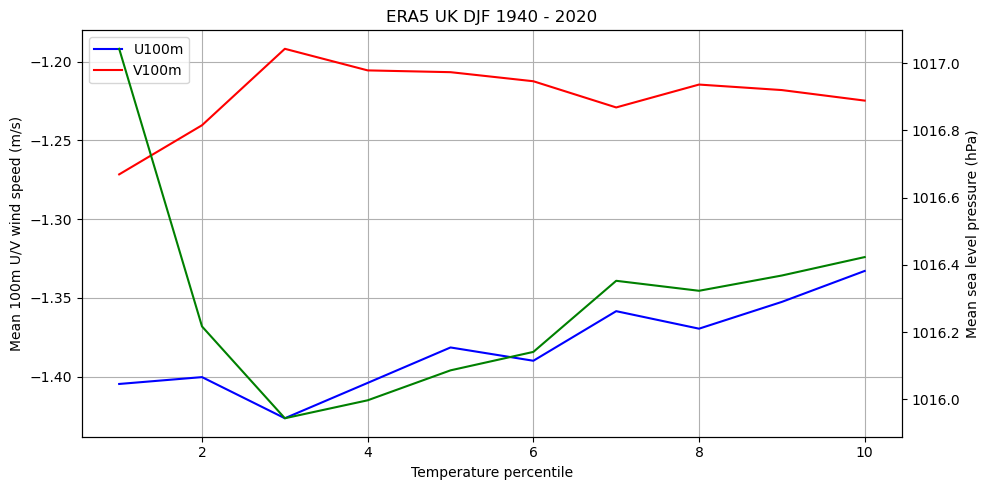

In [ ]:
# limit to the 1st to 10the percentiles
comp_djf_perc_limited = comp_djf_perc_hourly[comp_djf_perc_hourly["percentile"].isin(np.arange(1, 40 + 1, 1))]

# Set up two subplots
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))

# Plot the data
# including error bars for the 5th and 95th percentiles
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"], color="blue", label="U100m")

# # create a duplicate y-axis and plot the 100m wind speed
# axs2 = axs.twinx()

# Plot the data
axs.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# add a second y-axis
axs2 = axs.twinx()

# include the mean sea level pressure
axs2.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_psl"] / 100, color="green", label="Mean PSL")

# Set the label for the y axis
axs2.set_ylabel("Mean sea level pressure (hPa)")

# # mark the zero line as a reference
# # dashed
# axs2.axhline(0, color="red", linestyle="--")

# highlight the area beneath in blue
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_U"].min(), 0, color="blue", alpha=0.1)

# include labels for the axes
axs.set_xlabel("Temperature percentile")

# Set the labels
axs.set_ylabel("Mean 100m U/V wind speed (m/s)")

# include gridlines
axs.grid()

# include legend
axs.legend(loc="upper left")

# # include legend
# axs2.legend(loc="lower right")
# # highlighte the area above in red
# axs2.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# include labels eather side of the zero line for southerly and northerly flow
# axs2.text(3, -0.8, "Easterly flow", color="blue")

# axs2.text(3, 0.8, "Westerly flow", color="red")

# # Plot the data
# axs[1].plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_wind_speed"], color="blue", label="100m wind speed")

# # create a duplicate y-axis and plot the 100m wind speed
# axs3 = axs[1].twinx()

# # Plot the data
# axs3.plot(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"], color="red", label="V100m")

# # mark the zero line as a reference
# # dashed
# axs3.axhline(0, color="red", linestyle="--")

# # highlight the area beneath in blue
# axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].min(), 0, color="blue", alpha=0.1)

# # # highlighte the area above in red
# # axs3.fill_between(comp_djf_perc_limited["percentile"], comp_djf_perc_limited["mean_100m_V"].max(), 0, color="red", alpha=0.1)

# # include labels eather side of the zero line for southerly and northerly flow
# # axs3.text(3, -0.5, "Northerly flow", color="blue")

# # axs3.text(3, 0.5, "Southerly flow", color="red")

# # Set the labels
# axs[0].set_xlabel("Temperature percentile")

# # Set the labels
# axs[0].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs2.set_ylabel("Mean 100m U wind speed (m/s)")

# # Set the labels
# axs[1].set_xlabel("Temperature percentile")

# # Set the labels
# axs[1].set_ylabel("Mean 100m wind speed (m/s)")

# # Set the labels
# axs3.set_ylabel("Mean 100m V wind speed (m/s)")

# # Include titles showing the period
# axs[0].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # Include titles showing the period
# axs[1].set_title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# # include gridlines
# axs[0].grid()

# axs[1].grid()

# # include legend in the top left
# axs[0].legend(loc="upper right")

# # include legend for axs2
# axs2.legend(loc="lower right")

# # include legend in the top left
# axs[1].legend(loc="upper right")

# # include legend for axs3
# axs3.legend(loc="lower right")

# include a title
plt.title(f"ERA5 UK DJF {min_year_comp} - {max_year_comp}")

# set a tight layout
plt.tight_layout()